In [2]:
import pandas as pd

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Visualization
import matplotlib.pyplot as plt # Visualization
# from colorama import Fore

from sklearn.metrics import mean_absolute_error, mean_squared_error

import warnings # Supress warnings 
warnings.filterwarnings('ignore')

# plt.rcParams["figure.dpi"] = 200

In [3]:
df = pd.read_excel("Mahbub_demo_water quality Data.xlsx")


df.Year = df.Year.astype(str)
df.Month = df.Month.astype(str)

df['date']= df['Year']+"-"+df.Month
df.drop(["Year","Month"],axis = 1, inplace = True)
df.head()

WT   DO   BOD  COD  TSS     TN  TP     TN:TP    EC  CHL   SD    date
0   4  10.7  1.2  2.1  2.2  0.911  14  65.071429  185  2.0  3.1  1993-2
1   4  12.3  1.3  2.2  1.1  1.678  29  57.862069  158  0.4  0.8  1993-3
2   7  11.4  1.0  2.5  1.3  1.486  21  70.761905  175  1.6  0.7  1993-4
3  12   7.0  0.9  2.9  1.9  0.792  20  39.600000  179  2.1  1.0  1993-5
4  15   3.8  1.5  2.4  7.1  1.984  28  70.857143  178  1.0  3.5  1993-6

In [4]:
df.describe().T.round(2)

count    mean    std  min     25%     50%     75%     max
WT       80.0   12.65   7.21  0.0    6.00   12.00   18.25   29.00
DO       80.0    8.22   2.98  0.0    6.30    8.20    9.88   15.10
BOD      79.0    1.75   0.67  0.0    1.40    1.70    2.00    4.90
COD      78.0    2.81   0.67  0.0    2.42    2.75    3.10    5.30
TSS      80.0    5.59   6.93  0.0    2.00    3.40    6.72   48.70
TN       80.0    1.51   0.60  0.0    1.03    1.47    1.82    3.36
TP       80.0   30.06  17.93  0.0   19.75   26.50   34.50   96.00
TN:TP    80.0   58.87  36.14  0.0   34.65   53.26   78.46  197.82
EC       80.0  149.25  71.27  0.0  113.75  163.50  200.75  248.00
CHL      80.0    9.00   9.28  0.0    3.18    6.35   10.75   46.60
SD       80.0    1.31   0.68  0.0    0.80    1.15    1.60    3.50

In [9]:
df.shape

(80, 12)

In [5]:
df.TP.dtype

dtype('int64')

In [8]:
value = df.pop('date')
df.insert(0,'date',value= value)
df['date'] = pd.to_datetime(df['date'], format = '%Y/%m')

df.head(2)

date  WT   DO   BOD  COD  TSS     TN  TP     TN:TP    EC  CHL   SD
0 1993-02-01   4  10.7  1.2  2.1  2.2  0.911  14  65.071429  185  2.0  3.1
1 1993-03-01   4  12.3  1.3  2.2  1.1  1.678  29  57.862069  158  0.4  0.8

In [11]:
x= ['a','b']

for x,y in enumerate(x):
    print(x,y)

0 a
1 b


In [14]:
from datetime import datetime, date 

f, ax = plt.subplots(nrows=11, ncols=1, figsize=(15,25),dpi =400)
for i, column in enumerate(df.drop('date', axis=1).columns):
 
        sns.boxplot(x=df['date'].dt.year, y=df[column].fillna(method='ffill'), ax=ax[i])
        ax[i].set_title('Feature: {}'.format(column), fontsize=14)
        ax[i].set_ylabel(ylabel=column, fontsize=14, fontweight = "bold")


#         ax[i].set_xlim([date(1993, 1, 1), date(2000, 12, 30)])

plt.tight_layout()
plt.show()

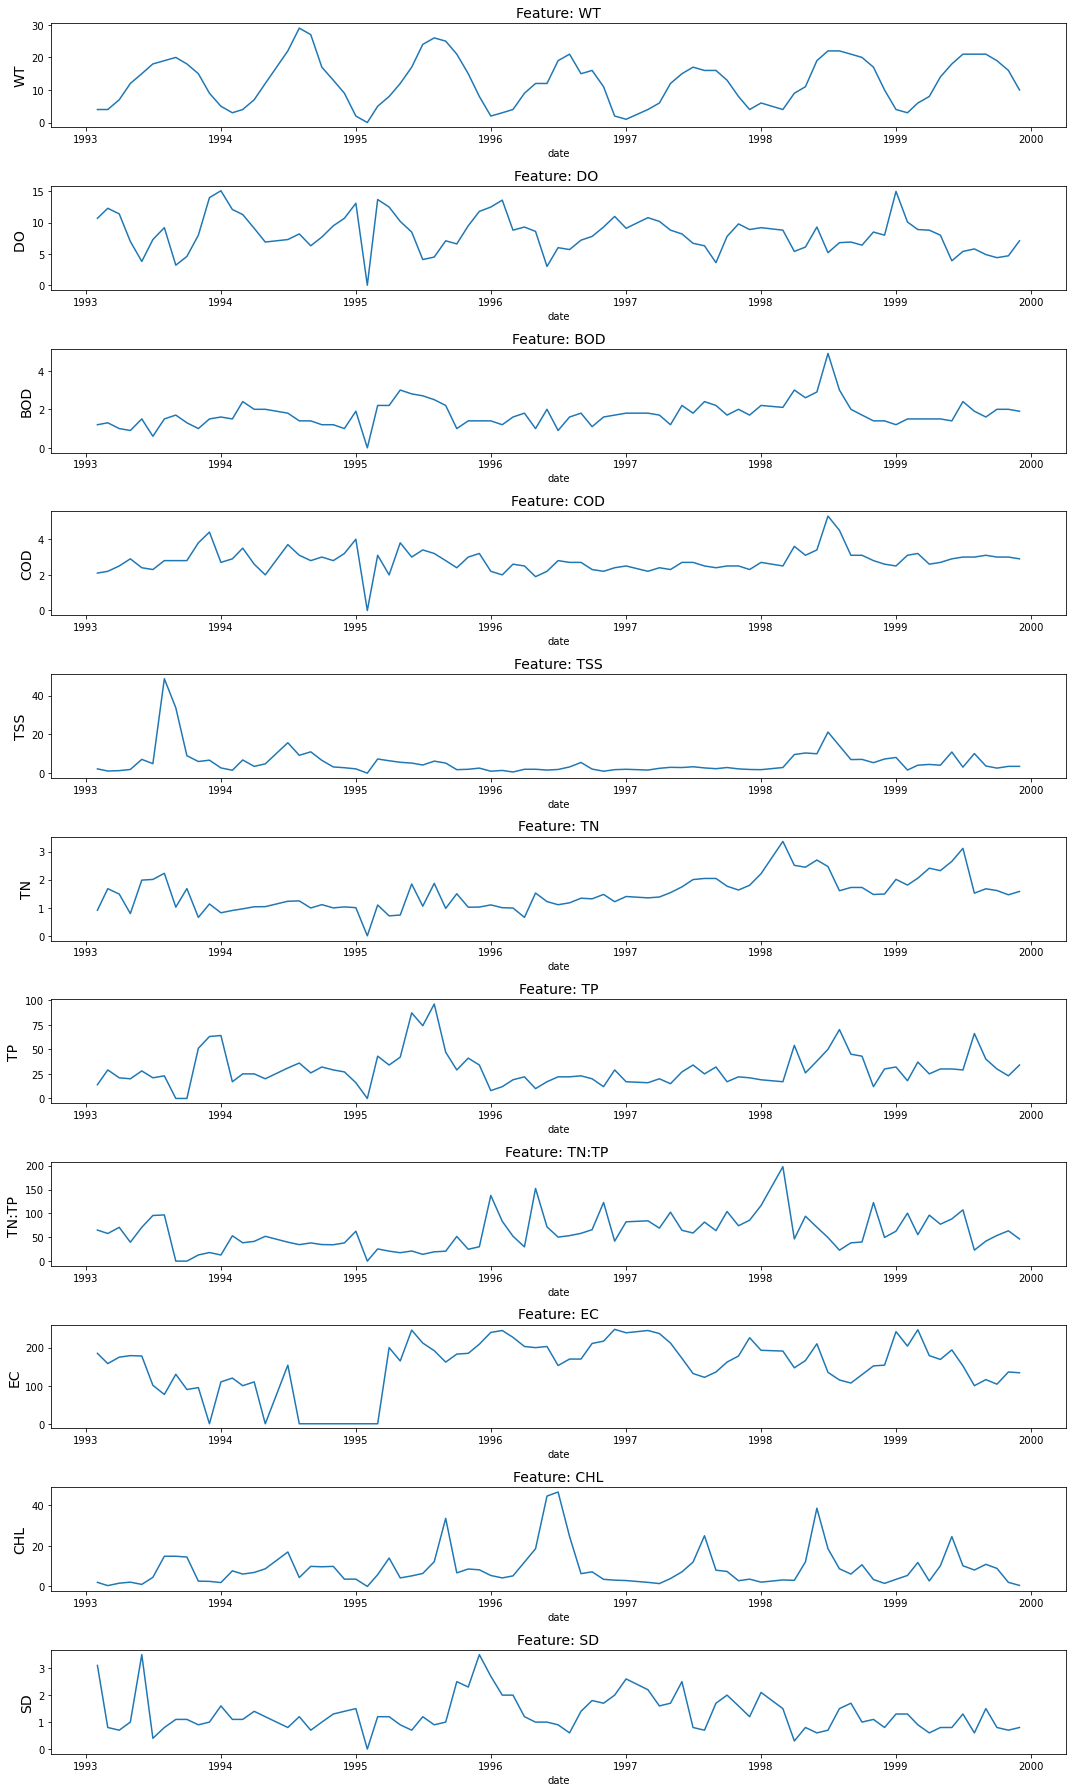

In [11]:
from datetime import datetime, date 

f, ax = plt.subplots(nrows=11, ncols=1, figsize=(15, 25))
for i, column in enumerate(df.drop('date', axis=1).columns):
 
        sns.lineplot(x=df['date'], y=df[column].fillna(method='ffill'), ax=ax[i])
        ax[i].set_title('Feature: {}'.format(column), fontsize=14)
        ax[i].set_ylabel(ylabel=column, fontsize=14)

#         ax[i].set_xlim([date(1993, 1, 1), date(2000, 12, 30)])

plt.tight_layout()
plt.show()

In [16]:
df.isna().sum()

date      0
WT        0
DO        0
BOD       1
COD       2
TSS       0
TN        0
TP        0
TN:TP     0
EC        0
CHL       0
SD        0
dtype: int64

In [17]:
df.isin([0]).sum()

date       0
WT         1
DO         1
BOD        1
COD        1
TSS        1
TN         1
TP         3
TN:TP      3
EC        10
CHL        1
SD         1
dtype: int64

In [19]:
df = df.replace(0, np.nan)

In [20]:
df.isin([0]).sum()

date      0
WT        0
DO        0
BOD       0
COD       0
TSS       0
TN        0
TP        0
TN:TP     0
EC        0
CHL       0
SD        0
dtype: int64

In [16]:
df.isna().sum()

date       0
WT         1
DO         1
BOD        2
COD        3
TSS        1
TN         1
TP         3
TN:TP      3
EC        10
CHL        1
SD         1
dtype: int64

In [17]:
df.EC.describe()

count     70.000000
mean     170.571429
std       46.114404
min       77.000000
25%      134.250000
50%      171.000000
75%      203.750000
max      248.000000
Name: EC, dtype: float64

In [21]:
df.duplicated().sum()

0

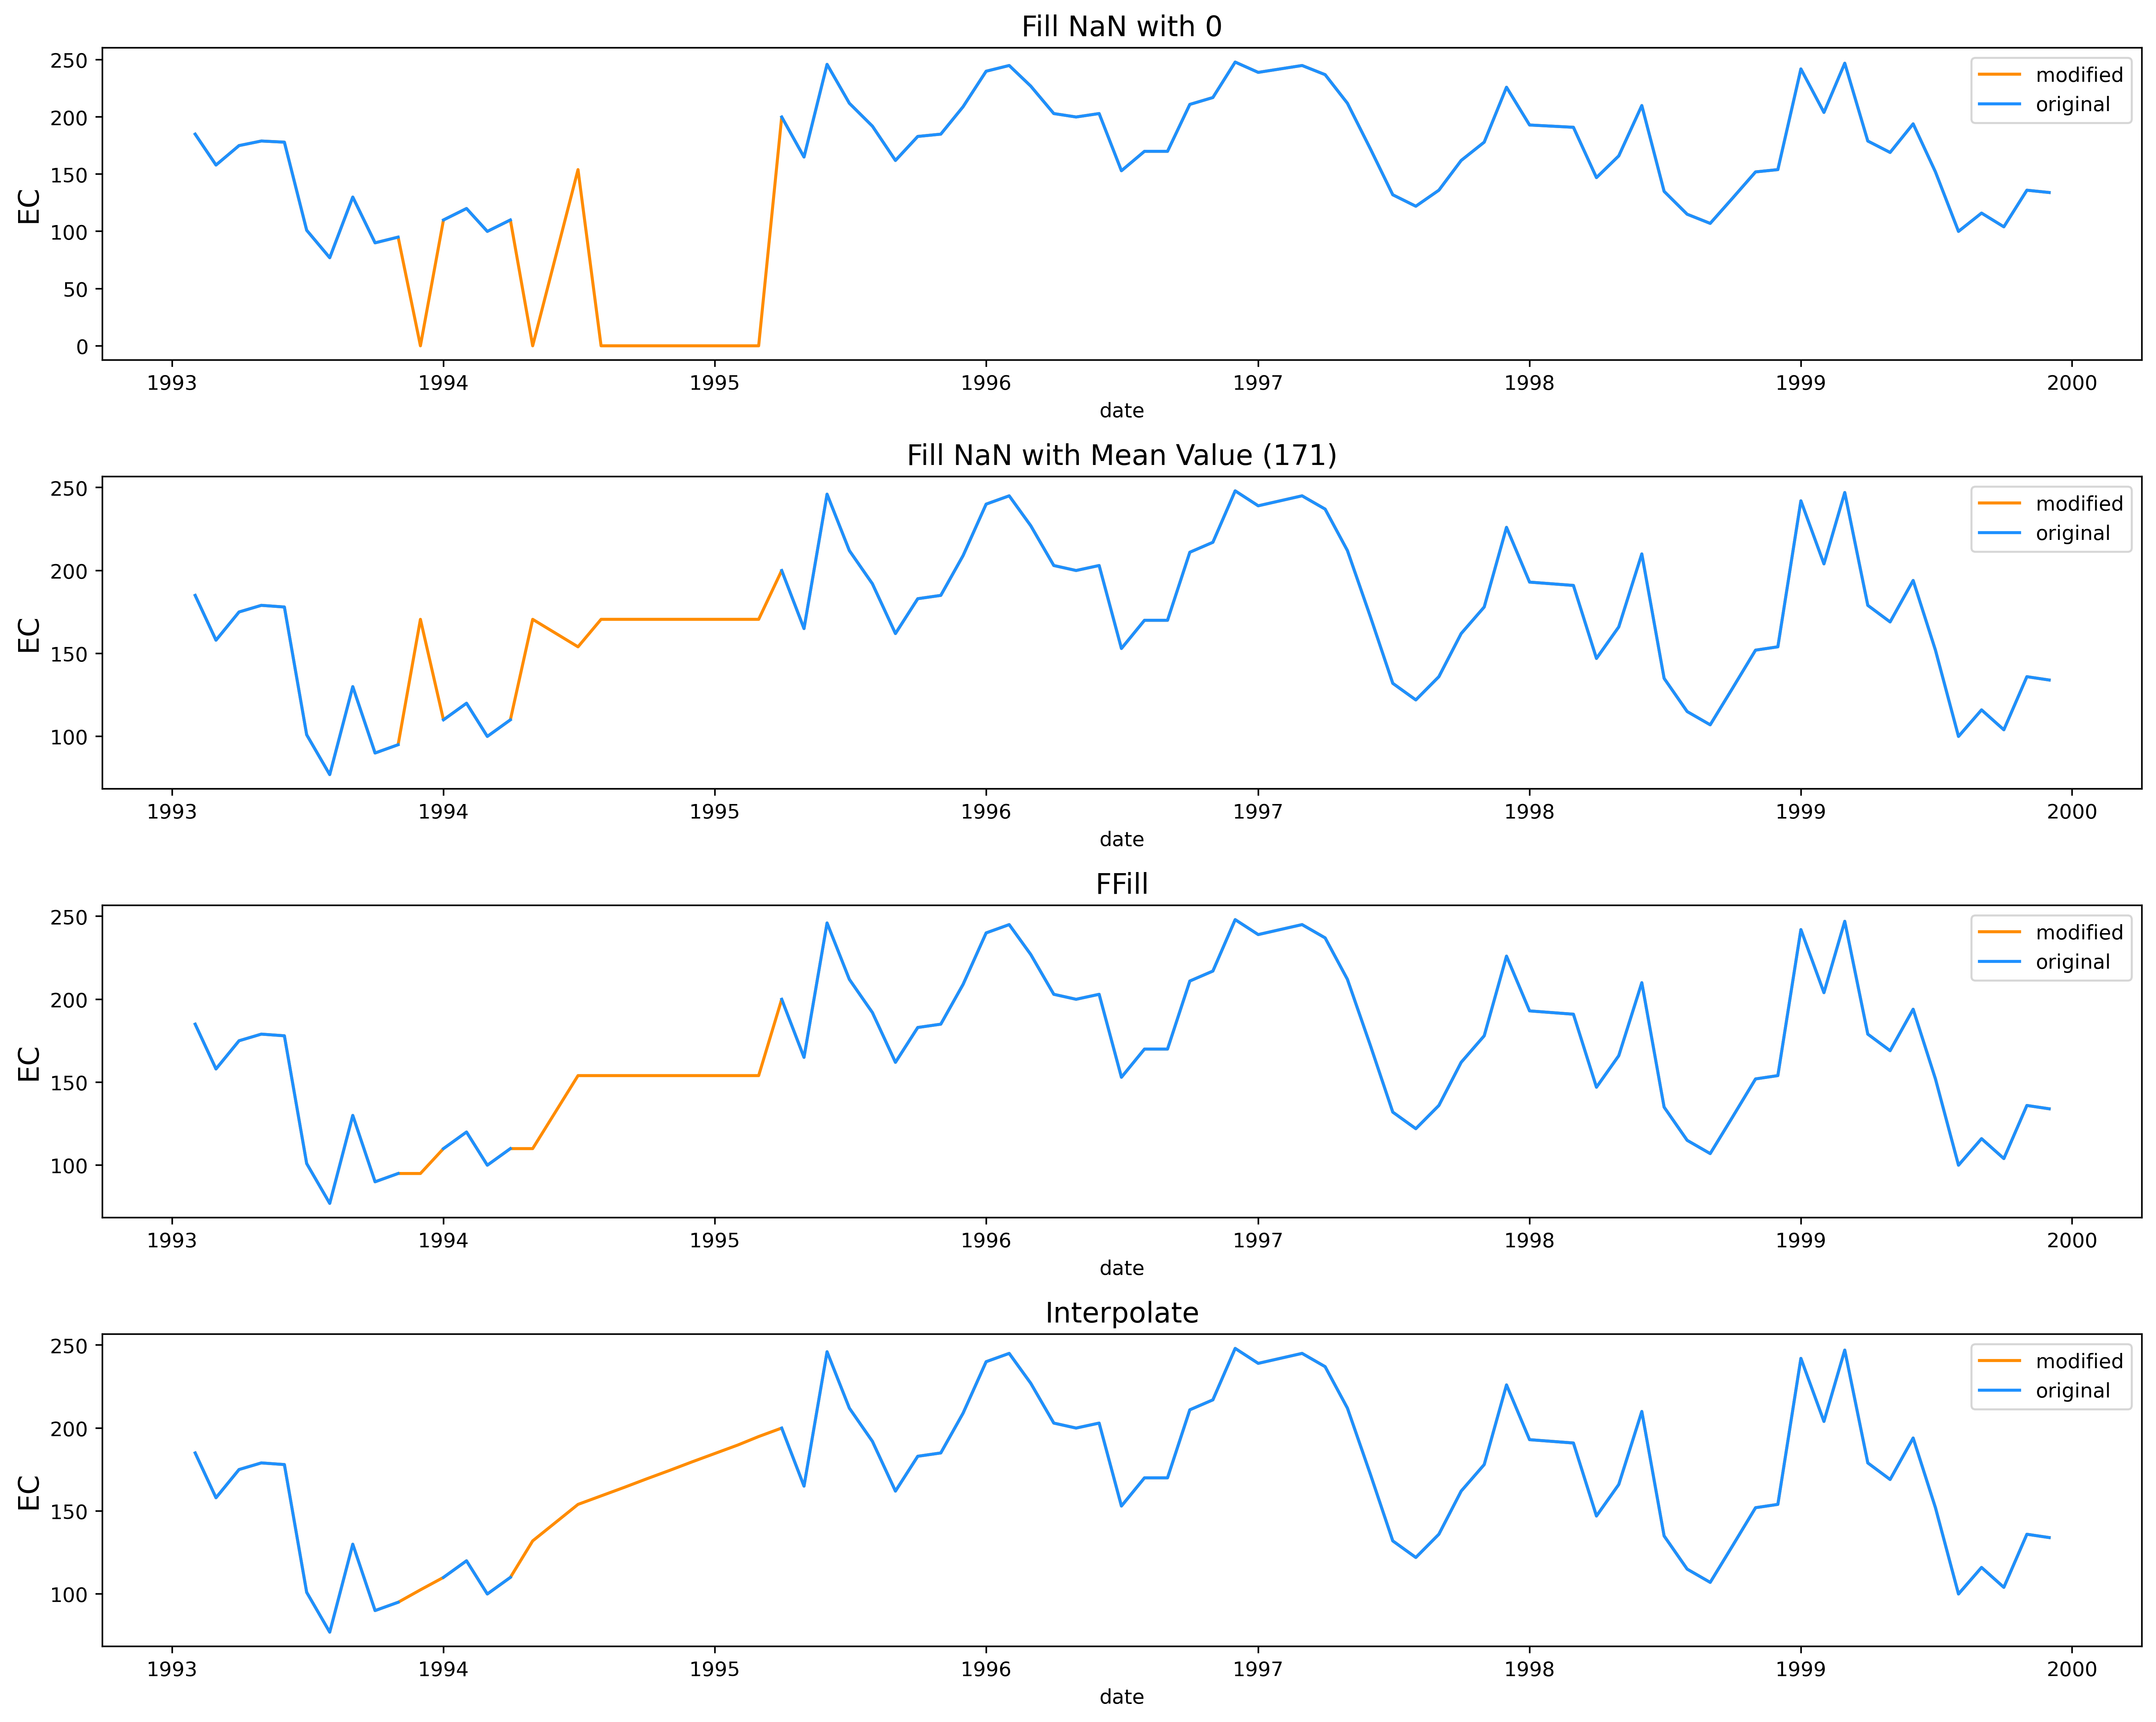

In [22]:
f, ax = plt.subplots(nrows=4, ncols=1, figsize=(15, 12),dpi =400)

sns.lineplot(x=df['date'], y=df['EC'].fillna(0), ax=ax[0], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['EC'].fillna(np.inf), ax=ax[0], color='dodgerblue', label = 'original')
ax[0].set_title('Fill NaN with 0', fontsize=14)
ax[0].set_ylabel(ylabel='EC', fontsize=14)

mean_drainage = df['EC'].mean()
sns.lineplot(x=df['date'], y=df['EC'].fillna(mean_drainage), ax=ax[1], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['EC'].fillna(np.inf), ax=ax[1], color='dodgerblue', label = 'original')
ax[1].set_title(f'Fill NaN with Mean Value ({mean_drainage:.0f})', fontsize=14)
ax[1].set_ylabel(ylabel='EC', fontsize=14)

sns.lineplot(x=df['date'], y=df['EC'].ffill(), ax=ax[2], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['EC'].fillna(np.inf), ax=ax[2], color='dodgerblue', label = 'original')
ax[2].set_title(f'FFill', fontsize=14)
ax[2].set_ylabel(ylabel='EC', fontsize=14)

sns.lineplot(x=df['date'], y=df['EC'].interpolate(), ax=ax[3], color='darkorange', label = 'modified')
sns.lineplot(x=df['date'], y=df['EC'].fillna(np.inf), ax=ax[3], color='dodgerblue', label = 'original')
ax[3].set_title(f'Interpolate', fontsize=14)
ax[3].set_ylabel(ylabel='EC', fontsize=14)

# for i in range(4):
#     ax[i].set_xlim([date(2019, 5, 1), date(2019, 10, 1)])
    
plt.tight_layout()
plt.show()

In [23]:
df= df.interpolate()
df

date    WT   DO   BOD  COD   TSS     TN    TP     TN:TP      EC  \
0  1993-02-01   4.0  10.7  1.2  2.1   2.2  0.911  14.0  65.071429  185.0   
1  1993-03-01   4.0  12.3  1.3  2.2   1.1  1.678  29.0  57.862069  158.0   
2  1993-04-01   7.0  11.4  1.0  2.5   1.3  1.486  21.0  70.761905  175.0   
3  1993-05-01  12.0   7.0  0.9  2.9   1.9  0.792  20.0  39.600000  179.0   
4  1993-06-01  15.0   3.8  1.5  2.4   7.1  1.984  28.0  70.857143  178.0   
..        ...   ...   ...  ...  ...   ...    ...   ...        ...    ...   
75 1999-08-01  21.0   5.8  1.9  3.0  10.1  1.520  66.0  23.030303  100.0   
76 1999-09-01  21.0   4.9  1.6  3.1   3.7  1.675  40.0  41.875000  116.0   
77 1999-10-01  19.0   4.4  2.0  3.0   2.6  1.612  30.0  53.733333  104.0   
78 1999-11-01  16.0   4.7  2.0  3.0   3.5  1.461  23.0  63.521739  136.0   
79 1999-12-01  10.0   7.1  1.9  2.9   3.5  1.580  34.0  46.470588  134.0   

     CHL   SD  
0    2.0  3.1  
1    0.4  0.8  
2    1.6  0.7  
3    2.1  1.0  
4    1.0  3.5  
..   ...  ...  
75   8.1  0.6  
76  10.9  1.5  
77   8.9  0.8  
78   2.0  0.7  
79   0.5  0.8  

[80 rows x 12 columns]

In [24]:
df.describe()

WT        DO         BOD        COD        TSS         TN  \
count  80.000000  80.000000  80.000000  80.000000  80.000000  80.000000   
mean   12.693750   8.391250   1.775625   2.861875   5.648125   1.519469   
std     7.143862   2.884493   0.638183   0.595040   6.900401   0.574147   
min     1.000000   3.000000   0.600000   1.900000   0.600000   0.657000   
25%     6.000000   6.375000   1.400000   2.500000   2.075000   1.037750   
50%    12.000000   8.350000   1.700000   2.800000   3.500000   1.473000   
75%    18.250000  10.125000   2.012500   3.100000   6.725000   1.817000   
max    29.000000  15.100000   4.900000   5.300000  48.700000   3.363000   

              TP      TN:TP           EC        CHL         SD  
count  80.000000   80.000000   80.000000  80.000000  80.000000  
mean   31.356250   60.794588  169.881250   9.055000   1.323125  
std    16.951775   34.339205   44.186358   9.239087   0.668455  
min     8.000000   12.812500   77.000000   0.400000   0.300000  
25%    20.000000   38.237037  134.750000   3.350000   0.800000  
50%    28.500000   53.571212  171.000000   6.350000   1.200000  
75%    36.250000   78.455000  200.750000  10.750000   1.600000  
max    96.000000  197.823529  248.000000  46.600000   3.500000

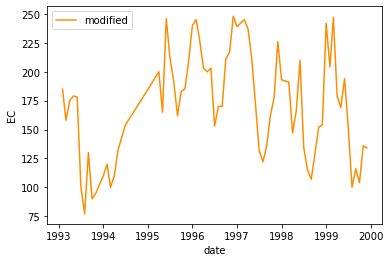

In [21]:
plt.figure()
sns.lineplot(x=df['date'], y=df['EC'].interpolate(), color='darkorange', label = 'modified')

In [26]:
df.columns

Index(['date', 'WT', 'DO ', 'BOD', 'COD', 'TSS', 'TN', 'TP', 'TN:TP ', 'EC',
       'CHL', 'SD'],
      dtype='object')

In [27]:
df.columns=df.columns.str.strip()
df.columns

Index(['date', 'WT', 'DO', 'BOD', 'COD', 'TSS', 'TN', 'TP', 'TN:TP', 'EC',
       'CHL', 'SD'],
      dtype='object')

In [172]:
# from statsmodels.tsa.seasonal import seasonal_decompose

# decompose_cols =  ['WT', 'DO ', 'BOD', 'COD', 'TSS', 'TN', 'TP', 'TN:TP ', 'EC','CHL', 'SD']

# for col in df.columns:
#     decomp = seasonal_decompose(df[col], freq=2, model='additive', extrapolate_trend='freq')
#     df[f"{col}_trend"] = decomp.trend
#     df[f"{col}_seasonal"] = decomp.seasonal

In [173]:
# fig, ax = plt.subplots(ncols=2, nrows=4, sharex=True, figsize=(16,8))

# for i, column in enumerate(['SD', 'CHL']):
    
#     res = seasonal_decompose(df[column], freq=10, model='additive', extrapolate_trend='freq')

#     ax[0,i].set_title('Decomposition of {}'.format(column), fontsize=16)
#     res.observed.plot(ax=ax[0,i], legend=False, color='dodgerblue')
#     ax[0,i].set_ylabel('Observed', fontsize=14)

#     res.trend.plot(ax=ax[1,i], legend=False, color='dodgerblue')
#     ax[1,i].set_ylabel('Trend', fontsize=14)

#     res.seasonal.plot(ax=ax[2,i], legend=False, color='dodgerblue')
#     ax[2,i].set_ylabel('Seasonal', fontsize=14)
    
#     res.resid.plot(ax=ax[3,i], legend=False, color='dodgerblue')
#     ax[3,i].set_ylabel('Residual', fontsize=14)

# plt.show()

In [174]:
# f, ax = plt.subplots(nrows=11, ncols=1, figsize=(20, 25))
# f.suptitle('Seasonal Components of Features', fontsize=16)

# for i, column in enumerate(df.columns.drop('date')):
#     sns.lineplot(x=df['date'], y=df[column + '_trend'], ax=ax[i], color='dodgerblue', label='P25')
#     ax[i].set_ylabel(ylabel=column, fontsize=14)
#     ax[i].set_xlim([date(1993,2,1), date(2000,8,1)])
    
# plt.tight_layout()
# plt.show()

In [175]:
# from pandas.plotting import autocorrelation_plot

# autocorrelation_plot(df['SD'])
# plt.show()

In [28]:
# import pandas as pd
# import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib notebook

In [30]:
df.skew()

WT       0.166087
DO       0.303519
BOD      1.696366
COD      1.334958
TSS      4.191309
TN       0.894544
TP       1.672505
TN:TP    1.234035
EC      -0.056011
CHL      2.370165
SD       1.346680
dtype: float64

<IPython.core.display.Javascript object>


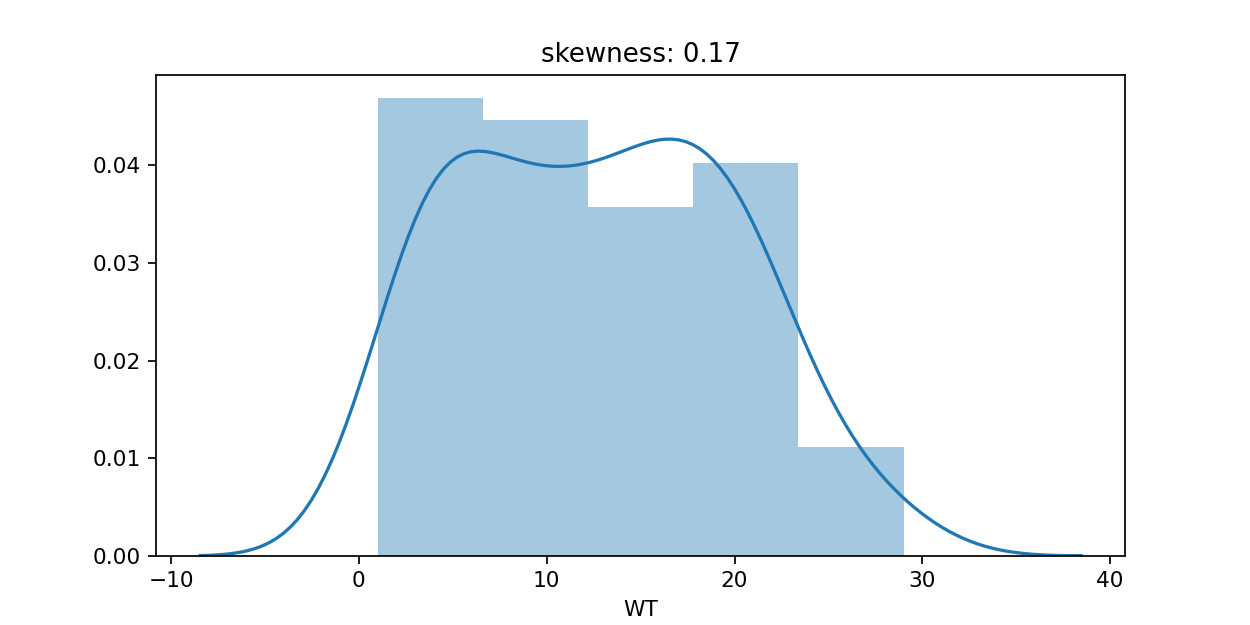

<IPython.core.display.Javascript object>


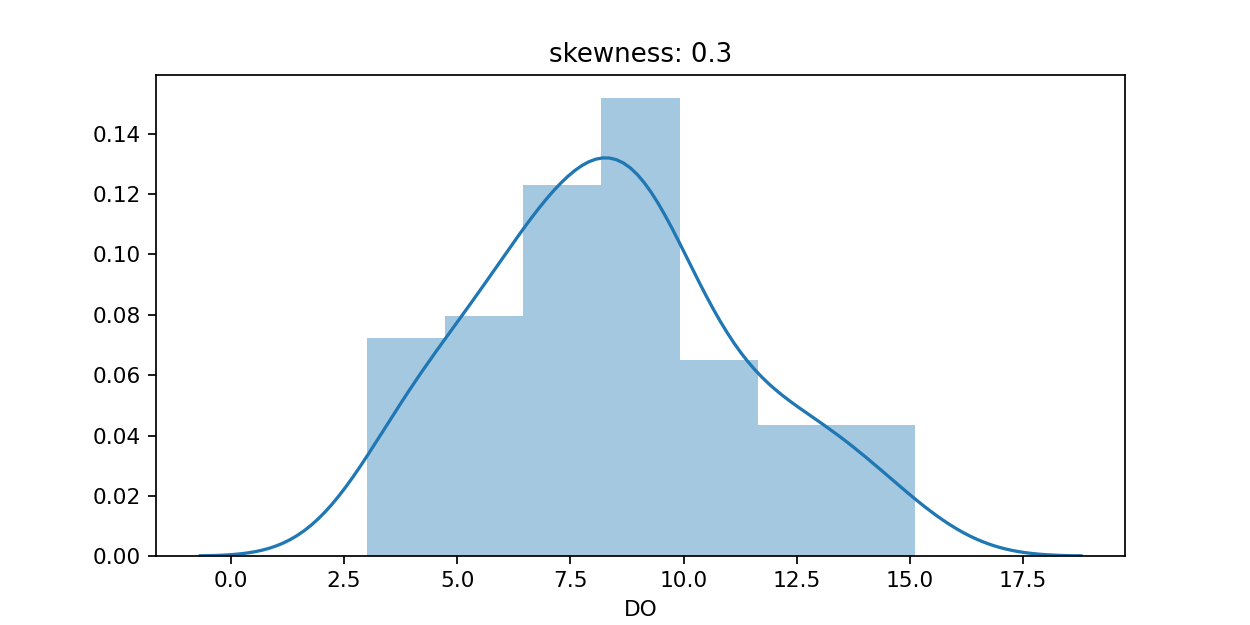

<IPython.core.display.Javascript object>


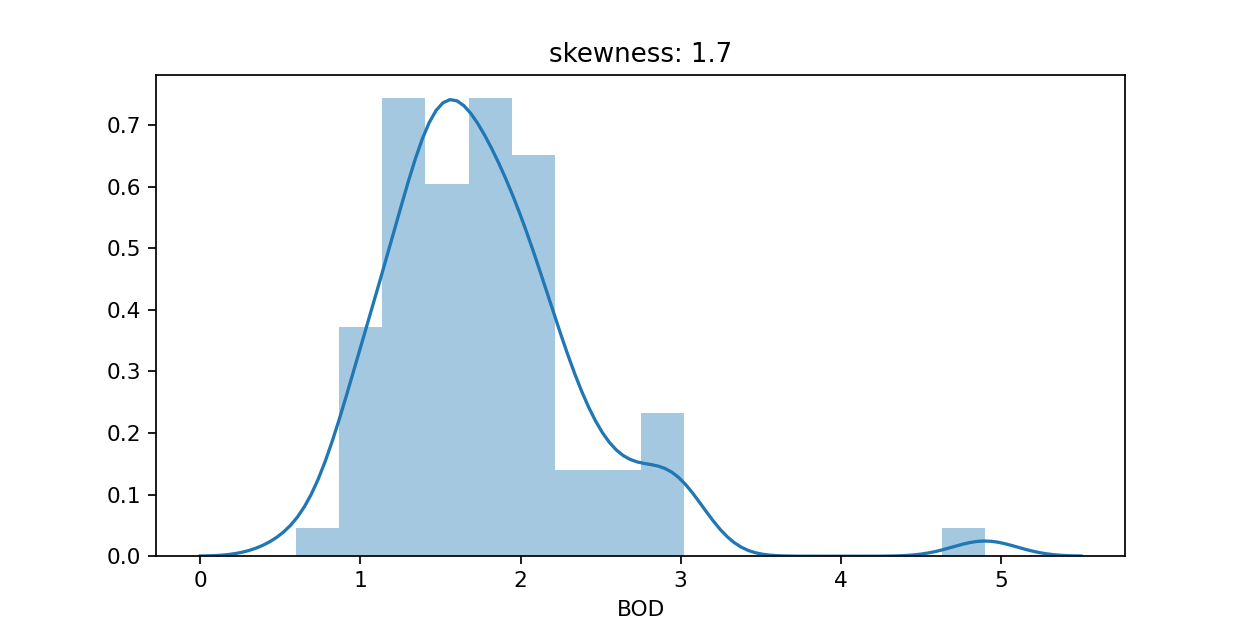

<IPython.core.display.Javascript object>


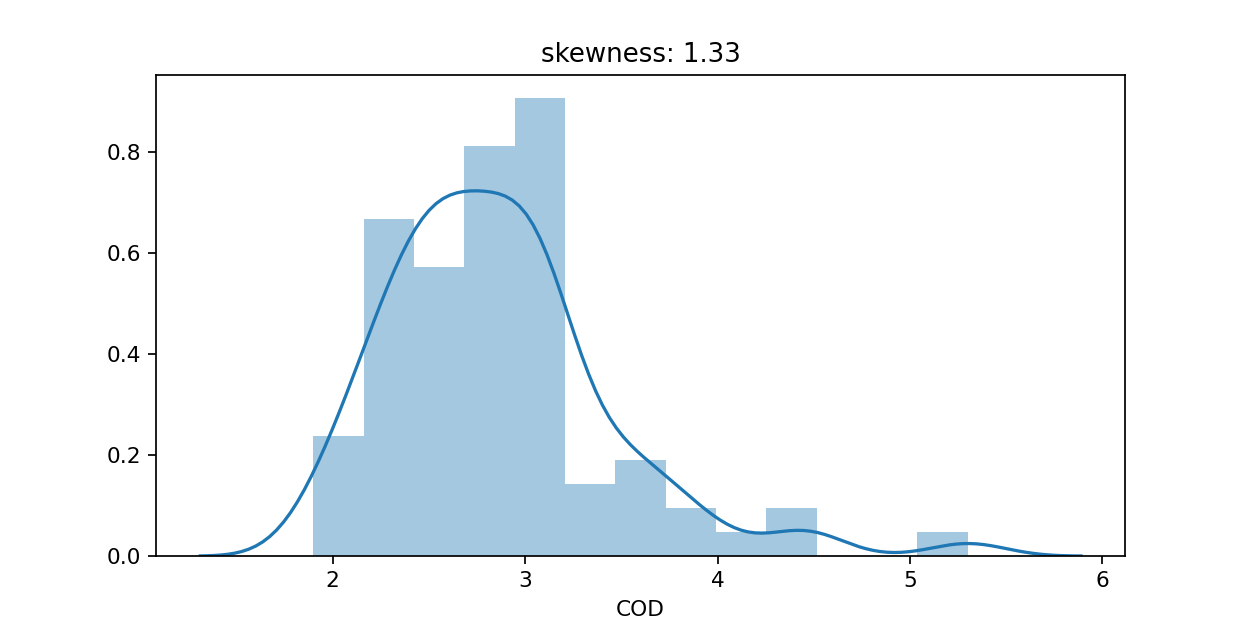

<IPython.core.display.Javascript object>


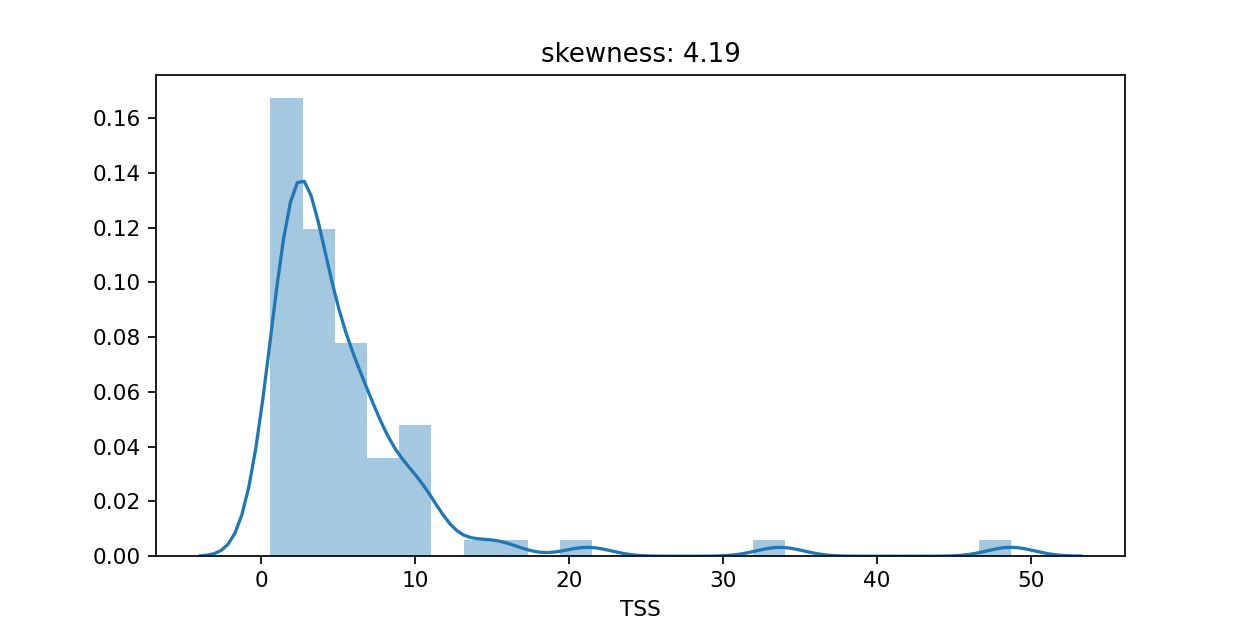

<IPython.core.display.Javascript object>


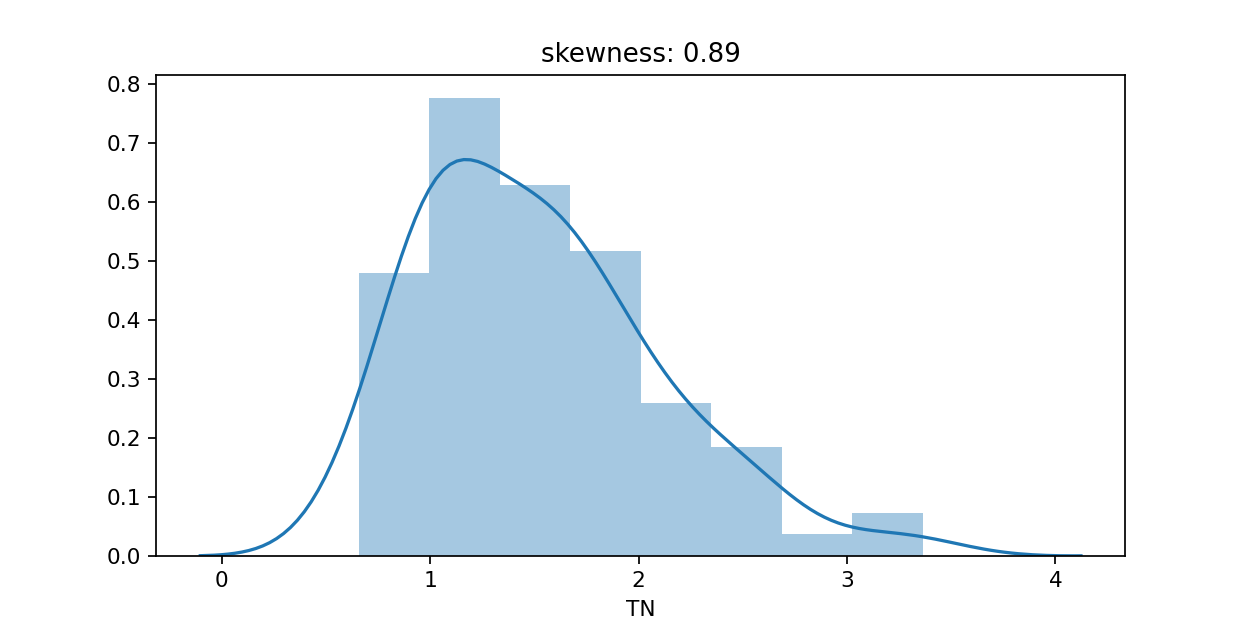

<IPython.core.display.Javascript object>


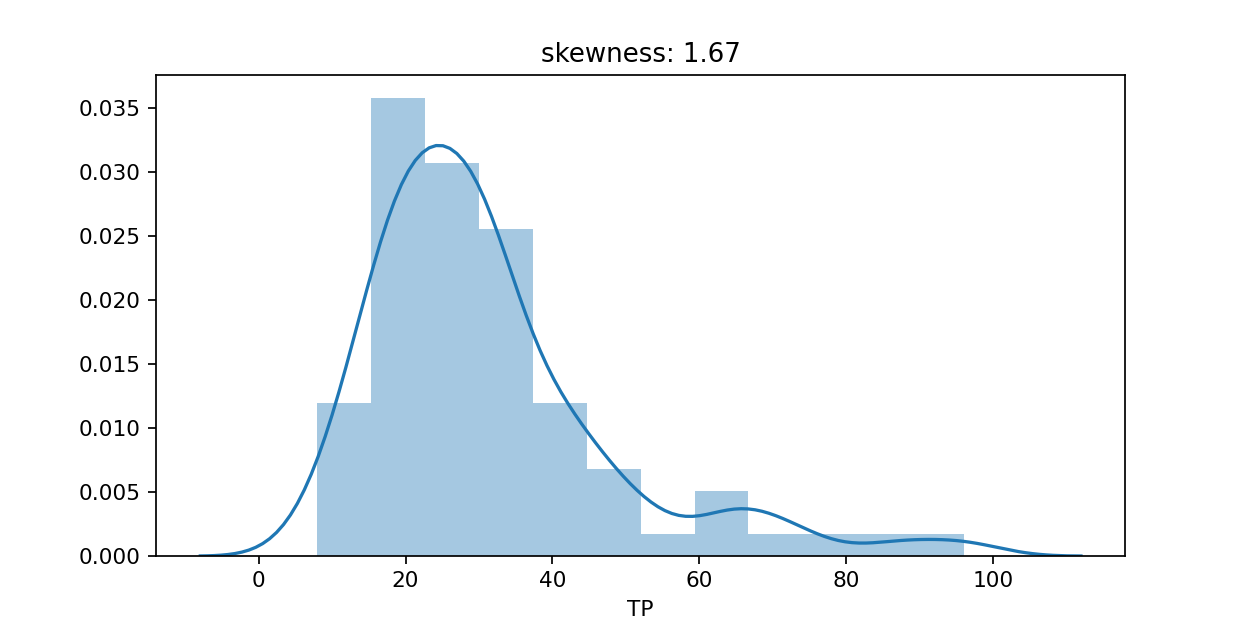

<IPython.core.display.Javascript object>


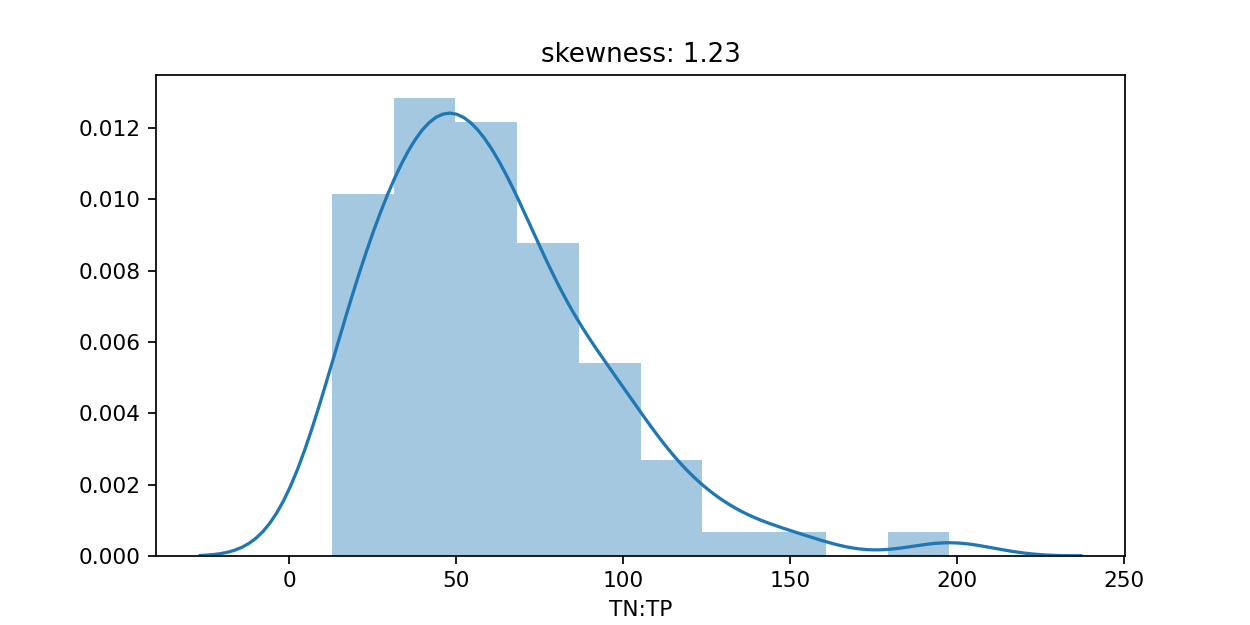

<IPython.core.display.Javascript object>


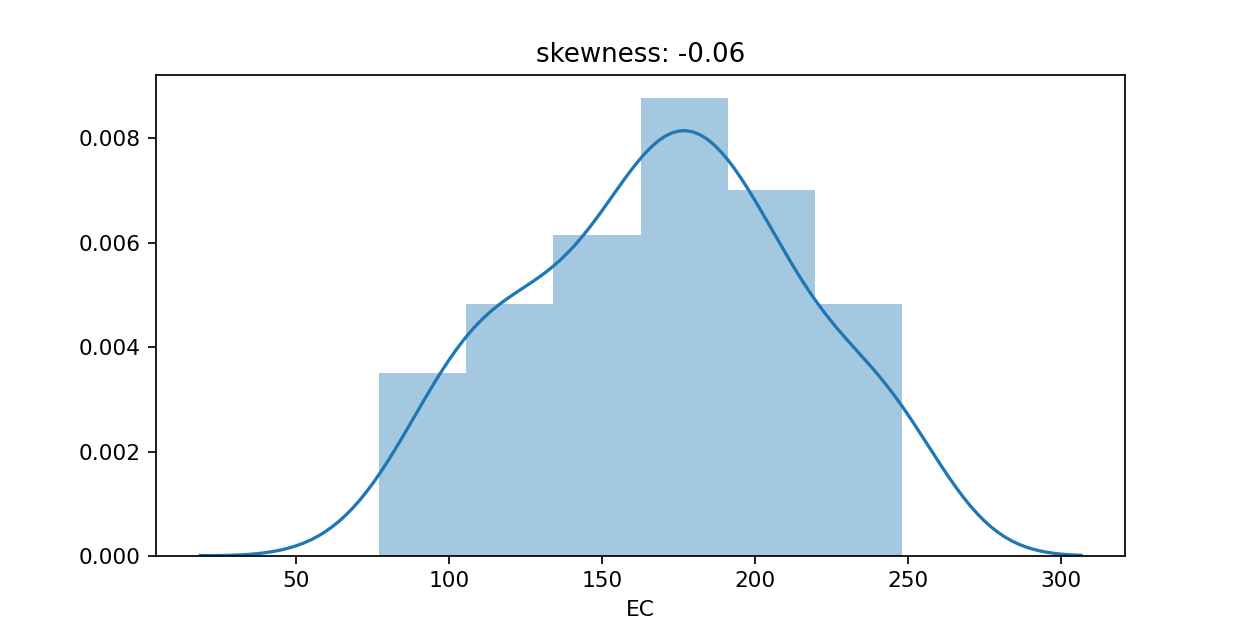

<IPython.core.display.Javascript object>


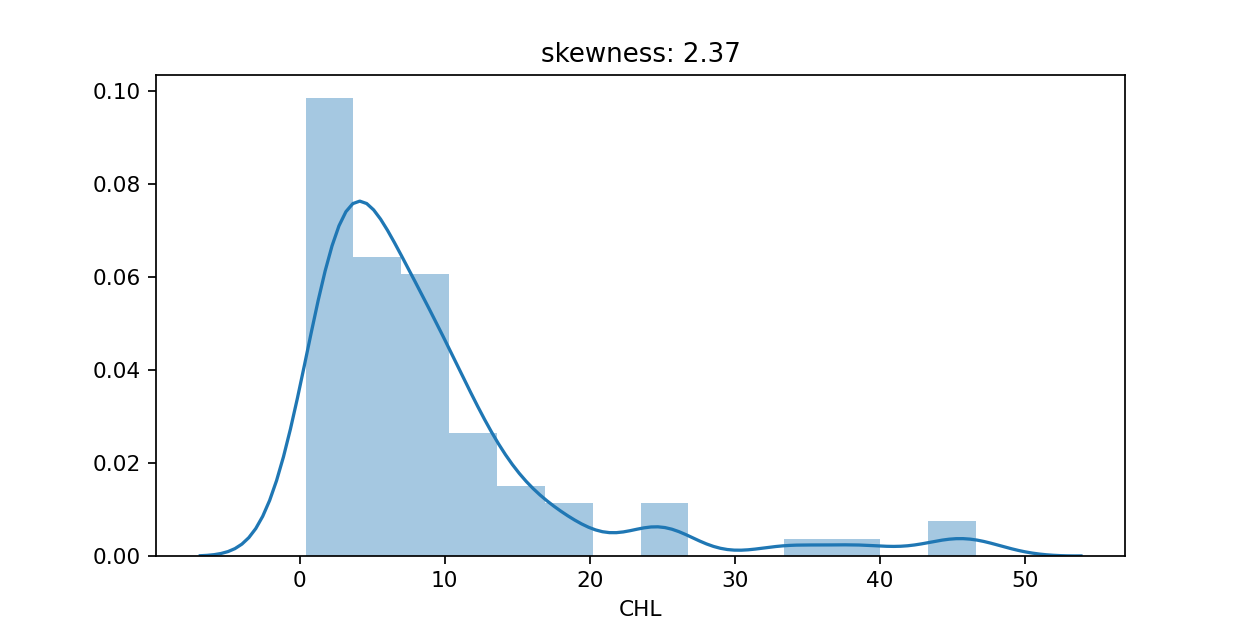

<IPython.core.display.Javascript object>


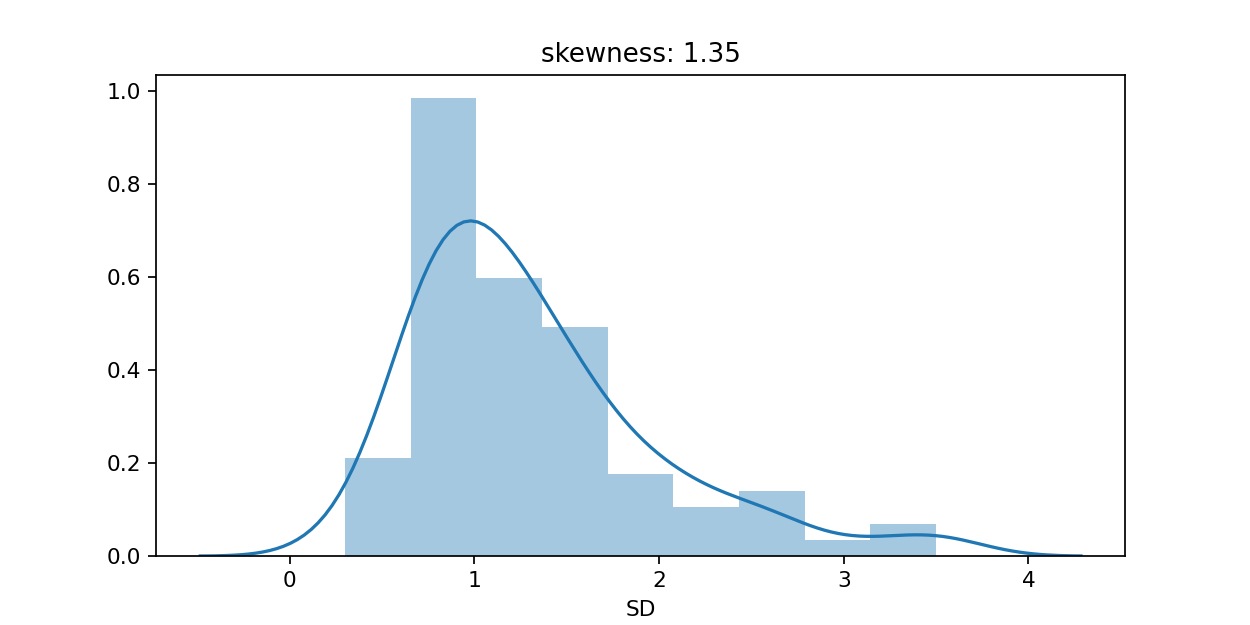

In [29]:

def plot_dist(pdf):
    for i, col in enumerate(pdf.columns):
        
        
        plt.figure(i, figsize=(8,4))
        plt.title(f'skewness: {pdf[col].skew().round(2)}')
        sns.distplot(pdf[col])
        
        
plot_dist(df) 

In [178]:
df['CHL']

0      2.0
1      0.4
2      1.6
3      2.1
4      1.0
      ... 
75     8.1
76    10.9
77     8.9
78     2.0
79     0.5
Name: CHL, Length: 80, dtype: float64

<IPython.core.display.Javascript object>


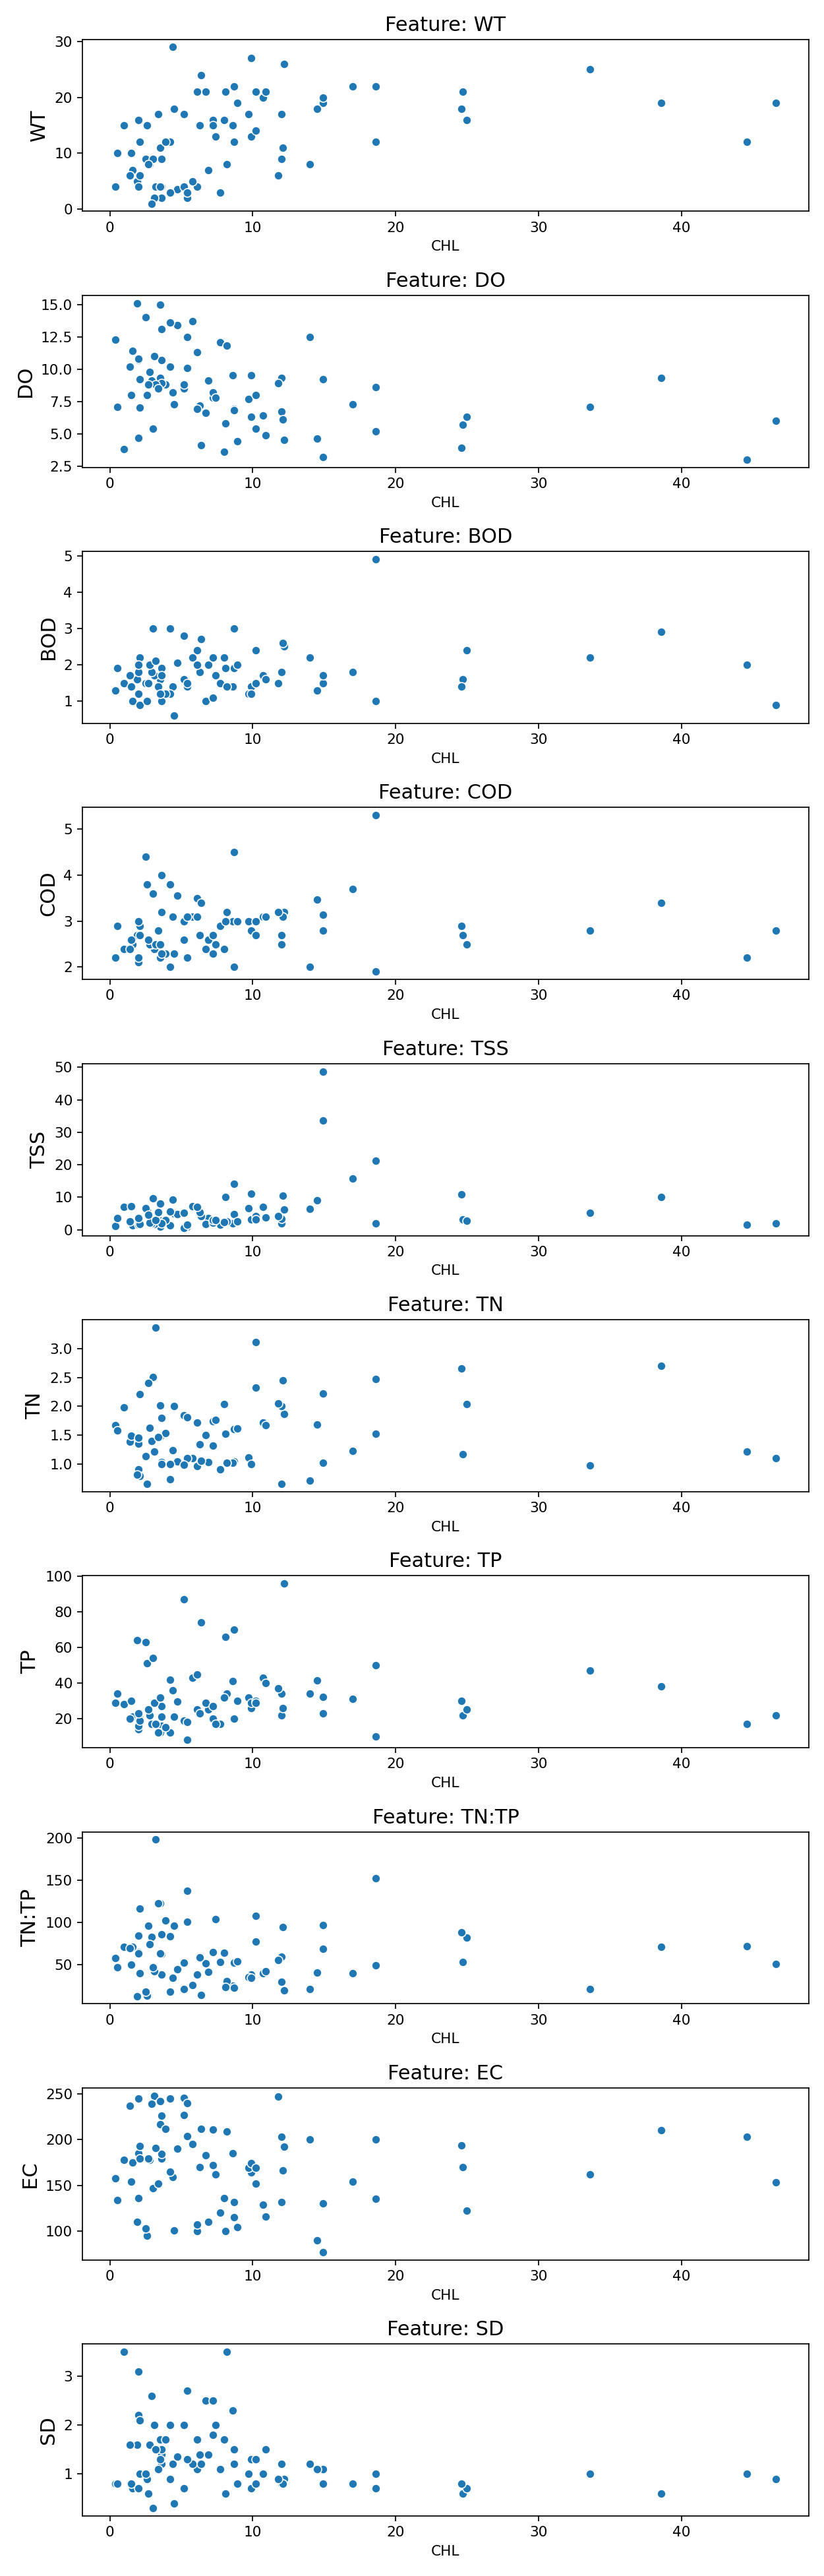

In [179]:
f, ax = plt.subplots(nrows=10, ncols=1, figsize=(8, 25))
def sctplot(df):
    
    for i, column in enumerate(df.drop(['date','CHL'], axis=1).columns):
        
 
        sns.scatterplot(x=df['CHL'], y=df[column].fillna(method='ffill'),ax = ax[i])
        ax[i].set_title('Feature: {}'.format(column), fontsize=14)
        ax[i].set_ylabel(ylabel=column, fontsize=14)

#         ax[i].set_xlim([date(1993, 1, 1), date(2000, 12, 30)])
        plt.tight_layout()
        plt.show()
sctplot(df)

<IPython.core.display.Javascript object>


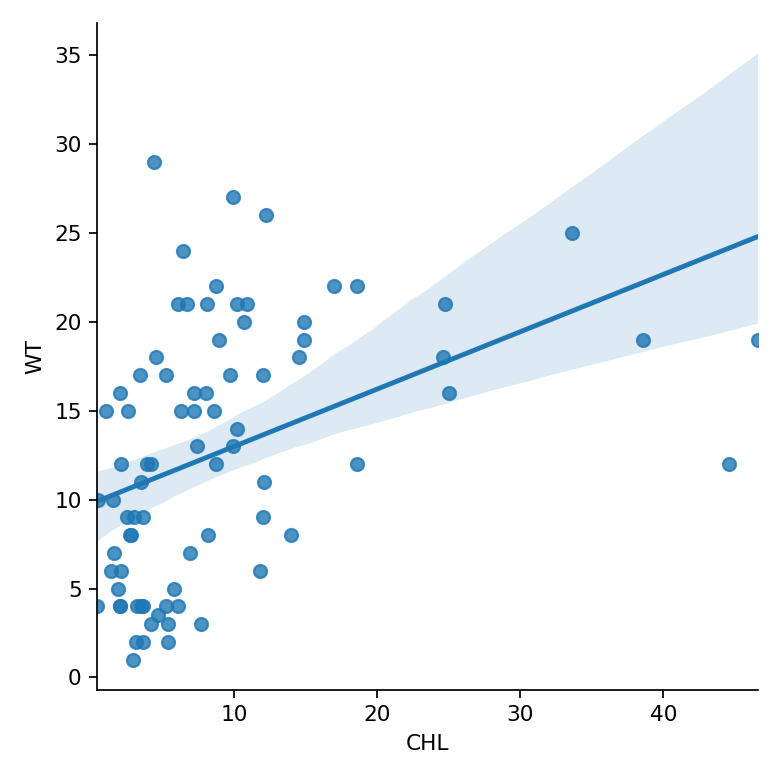

<IPython.core.display.Javascript object>


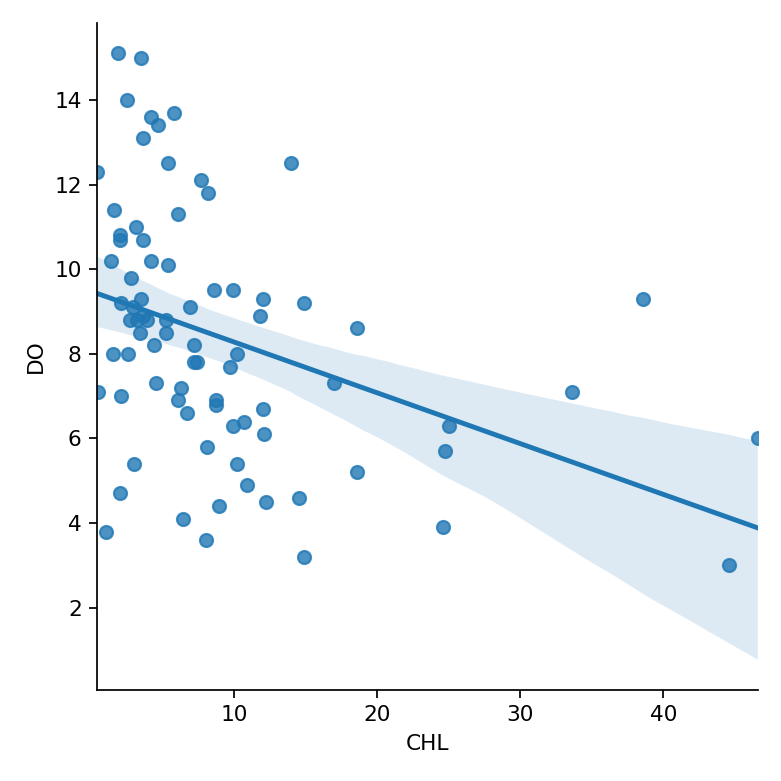

<IPython.core.display.Javascript object>


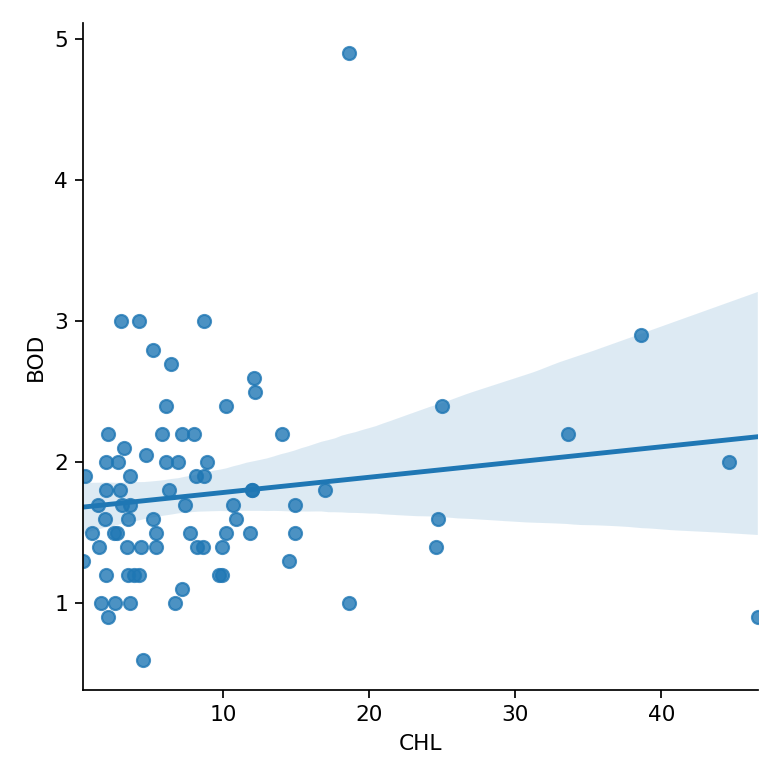

<IPython.core.display.Javascript object>


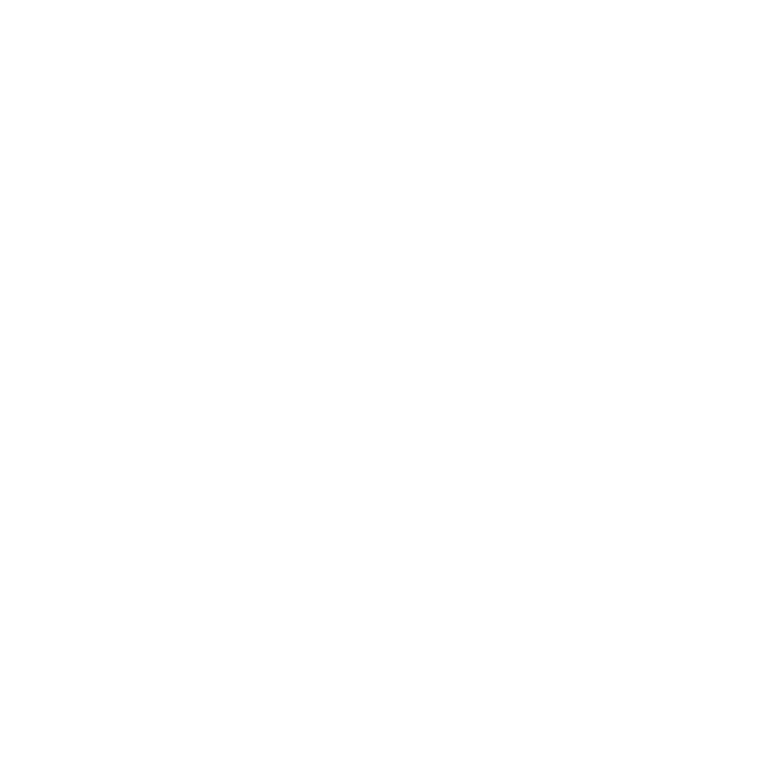

<IPython.core.display.Javascript object>


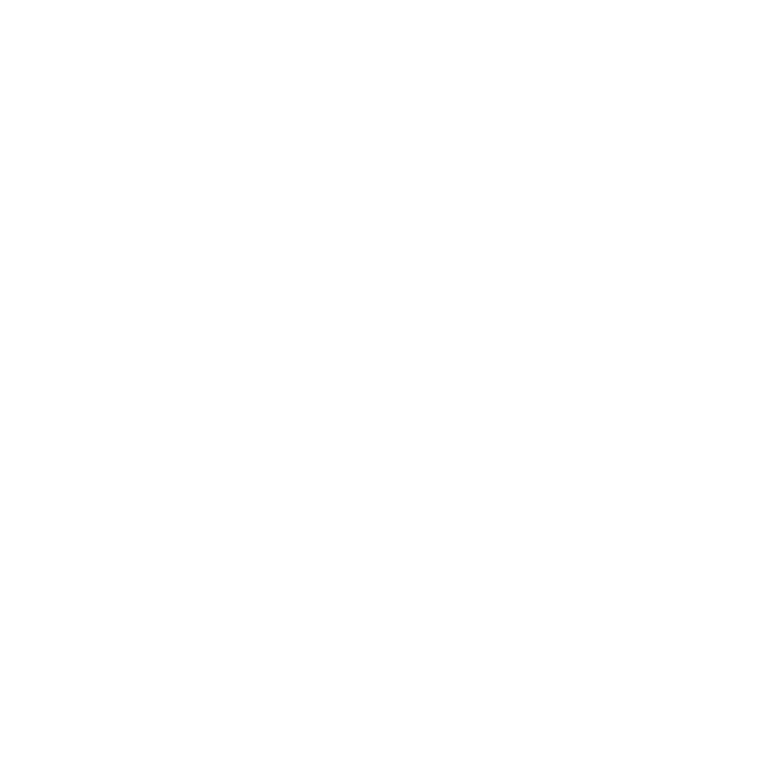

<IPython.core.display.Javascript object>


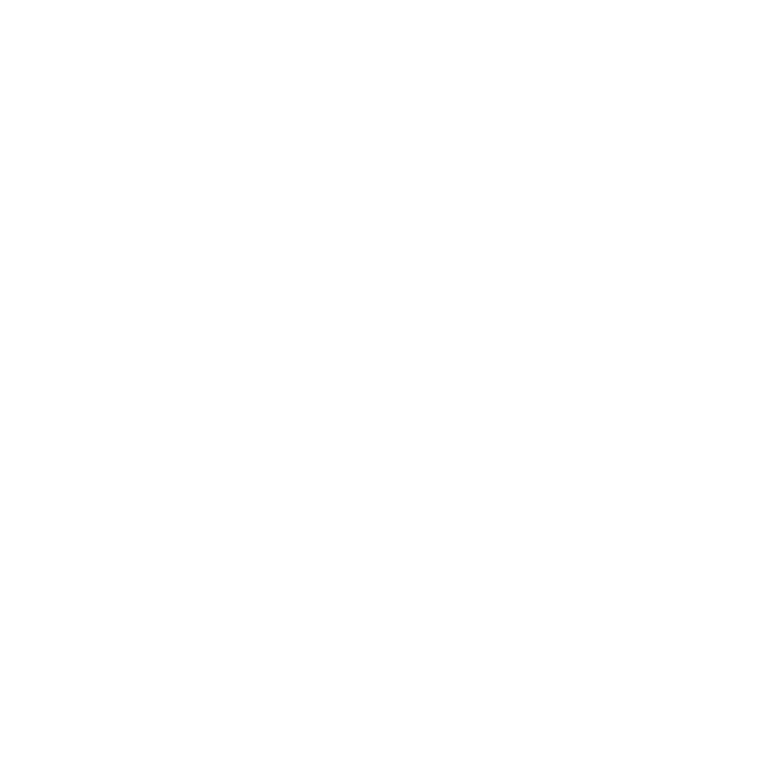

<IPython.core.display.Javascript object>


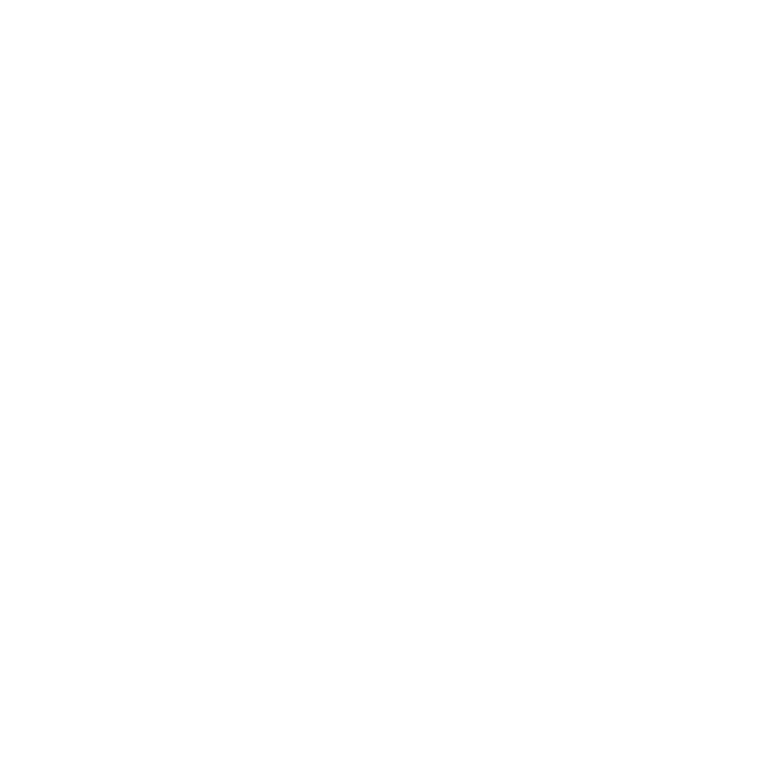

<IPython.core.display.Javascript object>


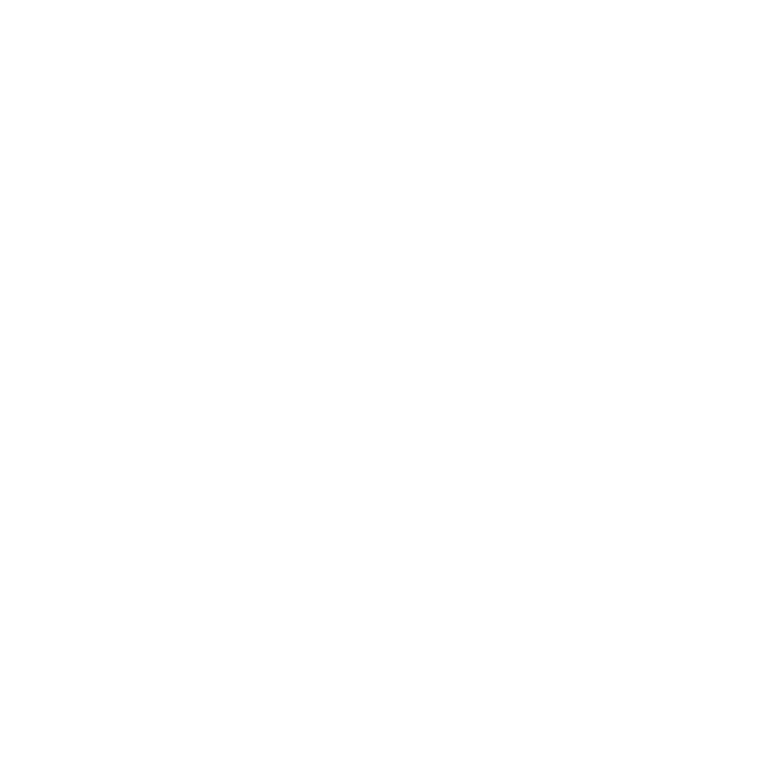

<IPython.core.display.Javascript object>


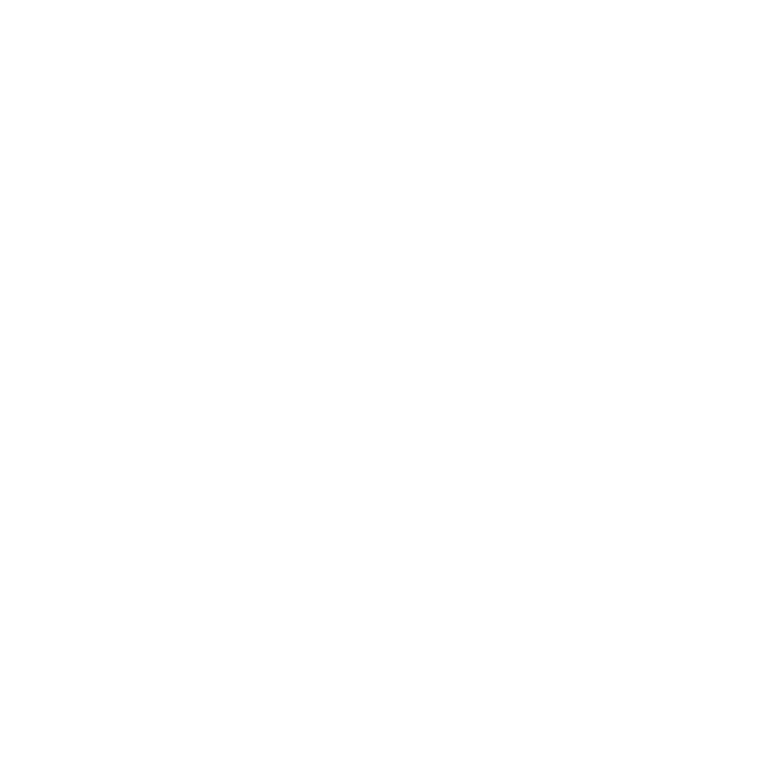

<IPython.core.display.Javascript object>


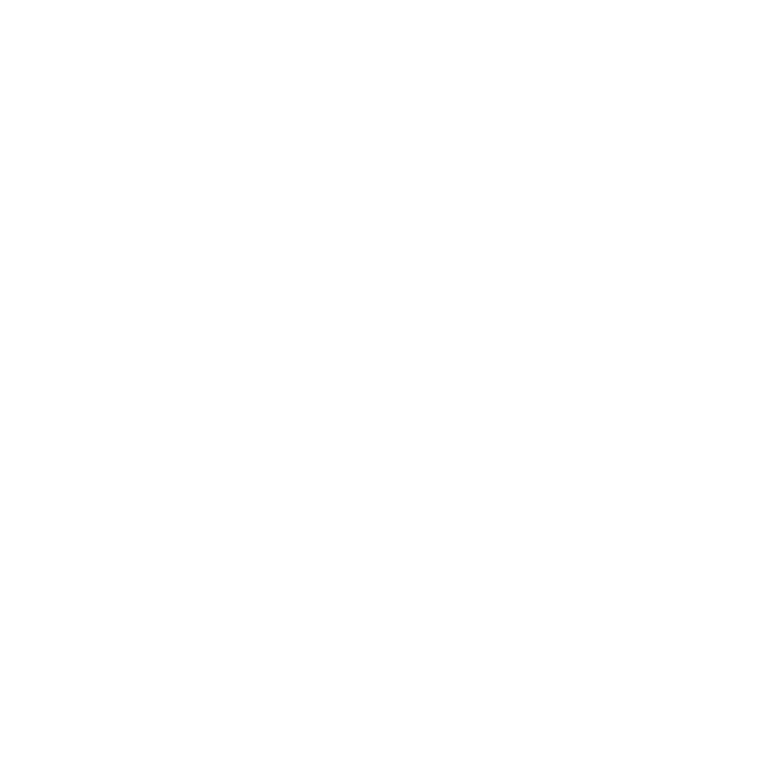

In [180]:
for col in df.drop(['CHL','date'], axis =1).columns:
    sns.lmplot(x= 'CHL', y= col, data = df)

<IPython.core.display.Javascript object>


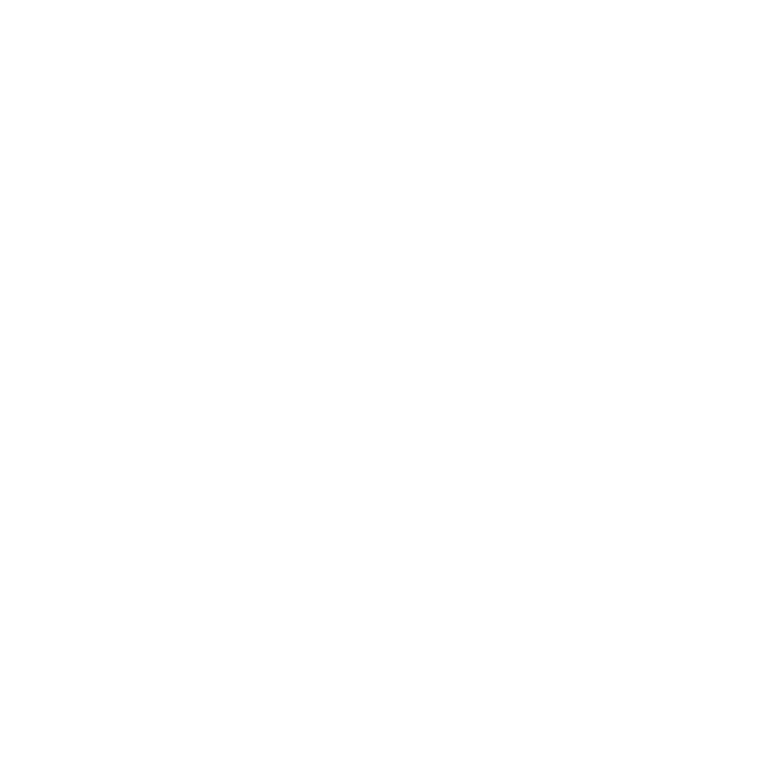

<IPython.core.display.Javascript object>


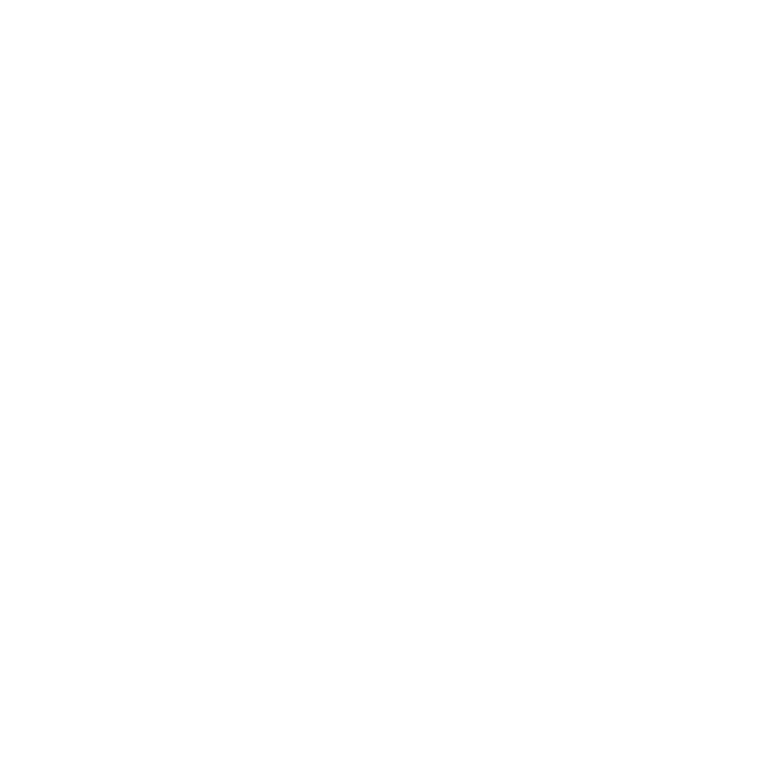

<IPython.core.display.Javascript object>


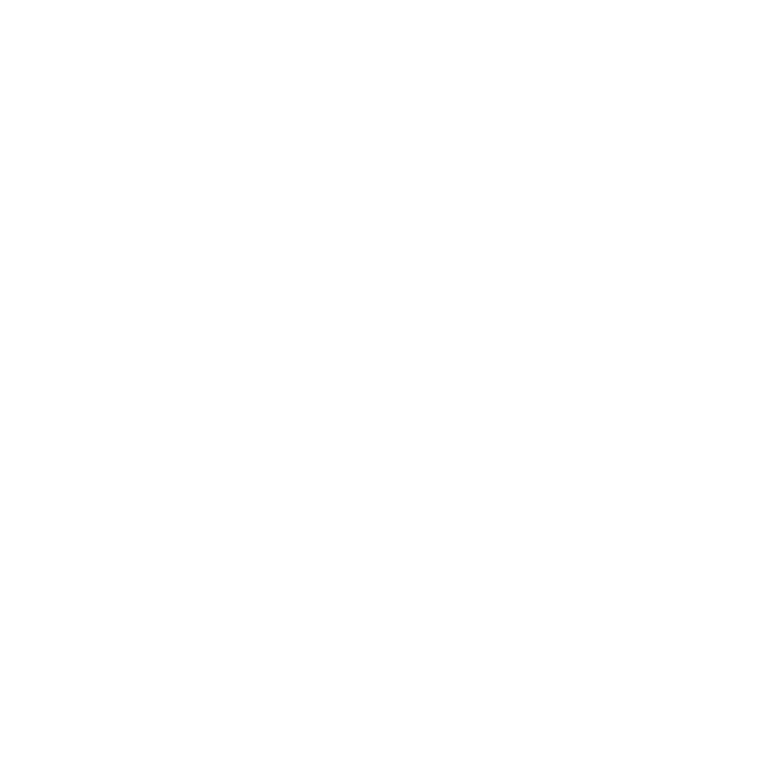

<IPython.core.display.Javascript object>


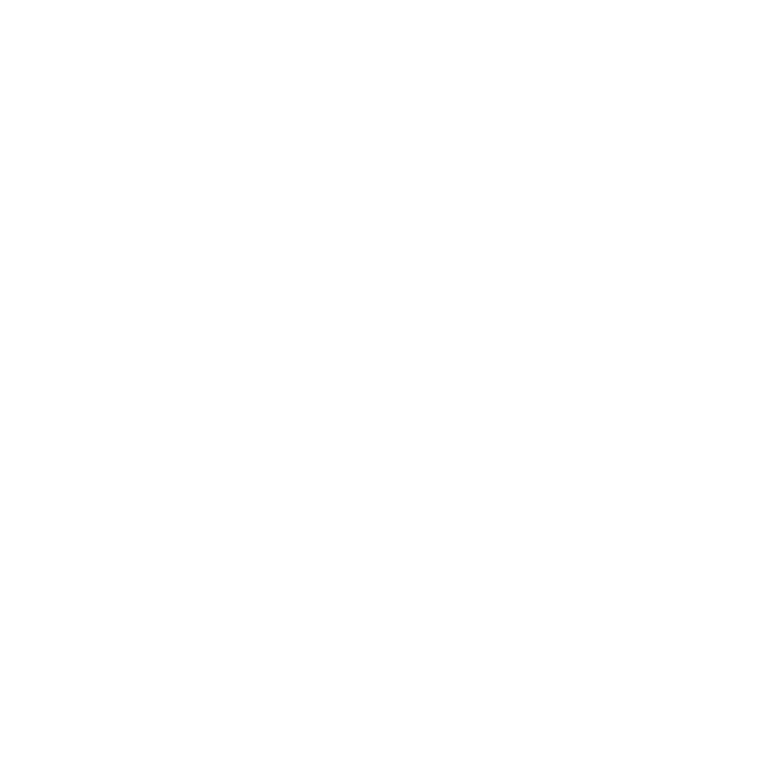

<IPython.core.display.Javascript object>


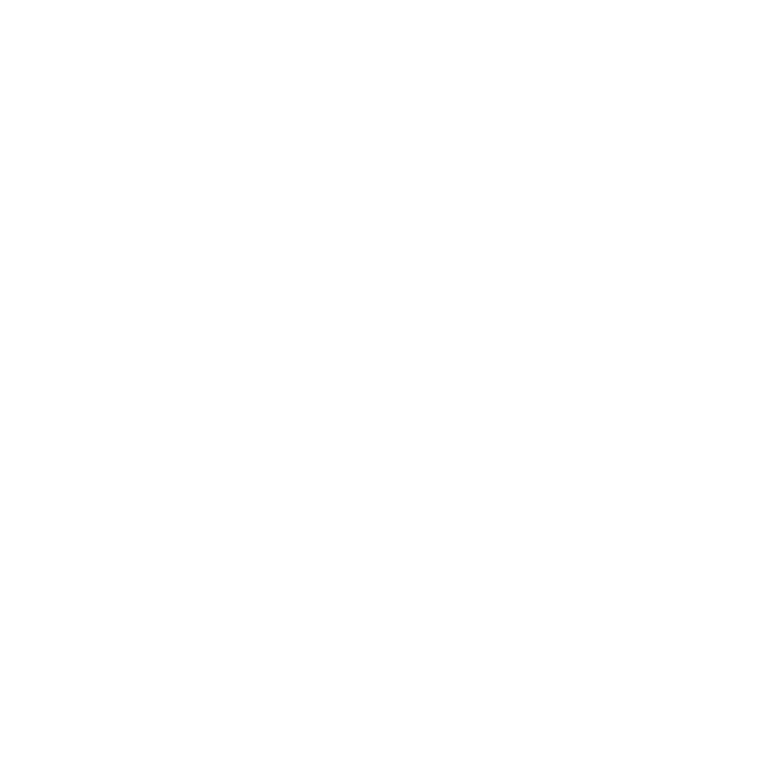

<IPython.core.display.Javascript object>


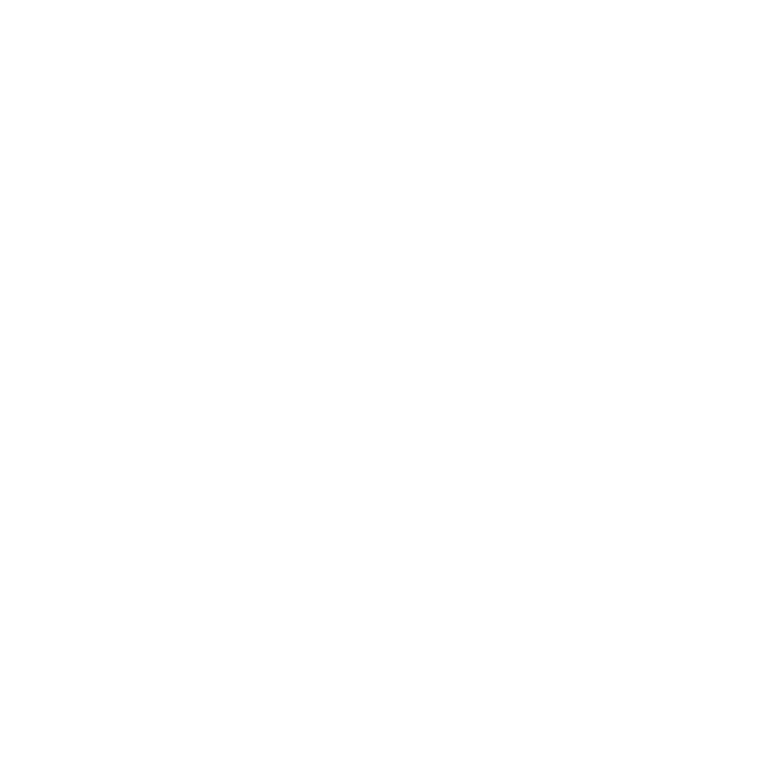

<IPython.core.display.Javascript object>


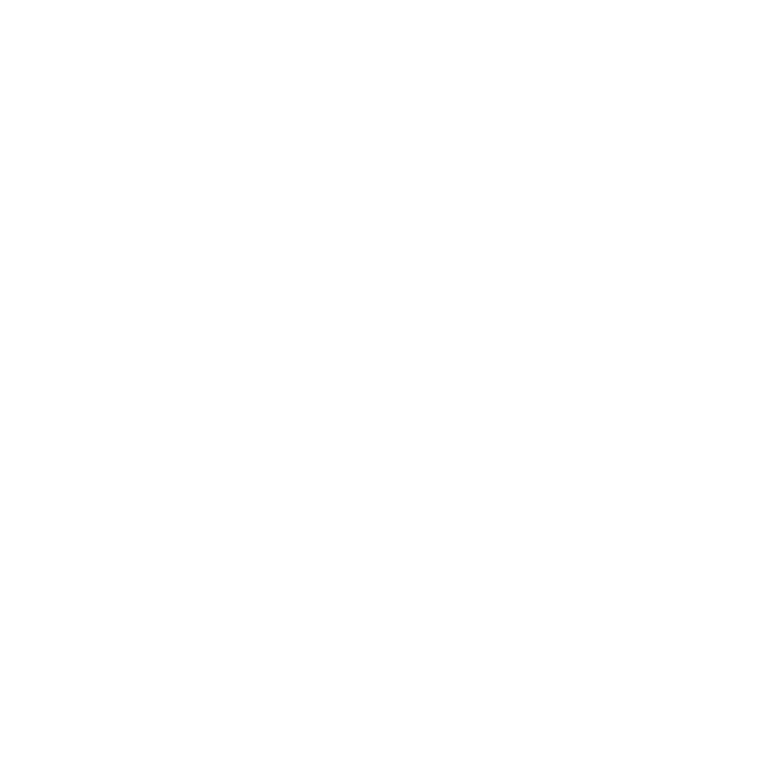

<IPython.core.display.Javascript object>


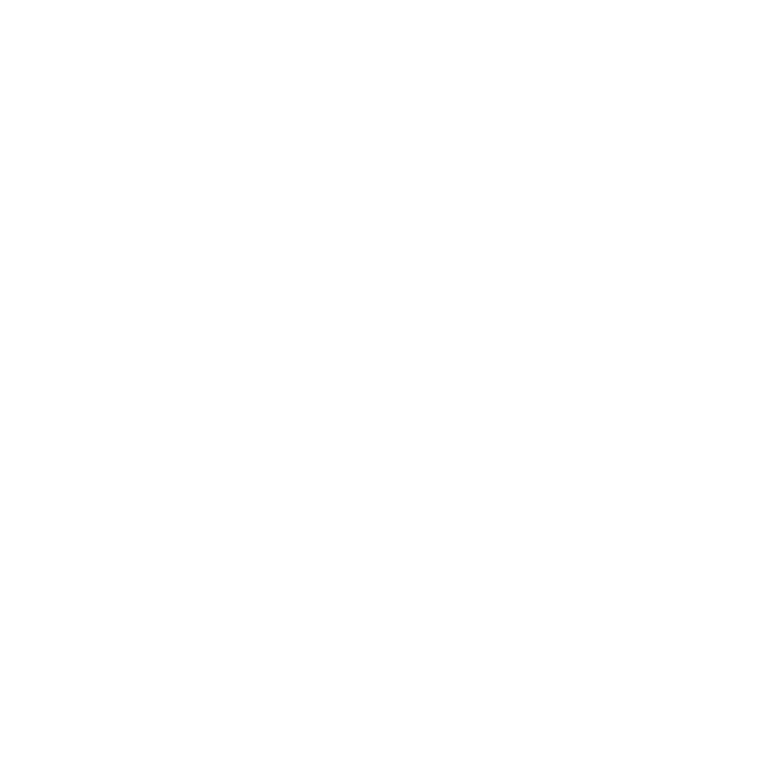

<IPython.core.display.Javascript object>


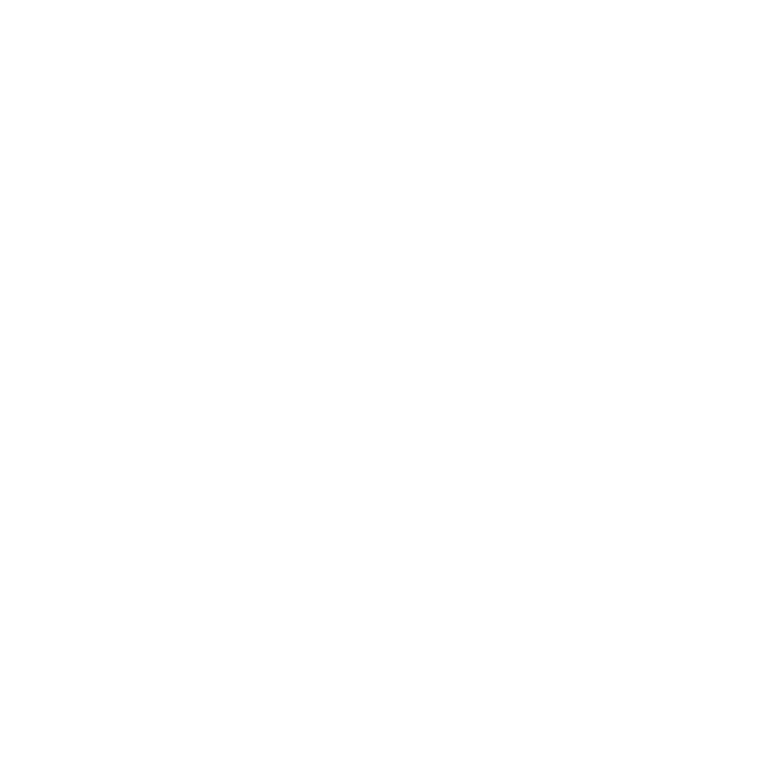

<IPython.core.display.Javascript object>


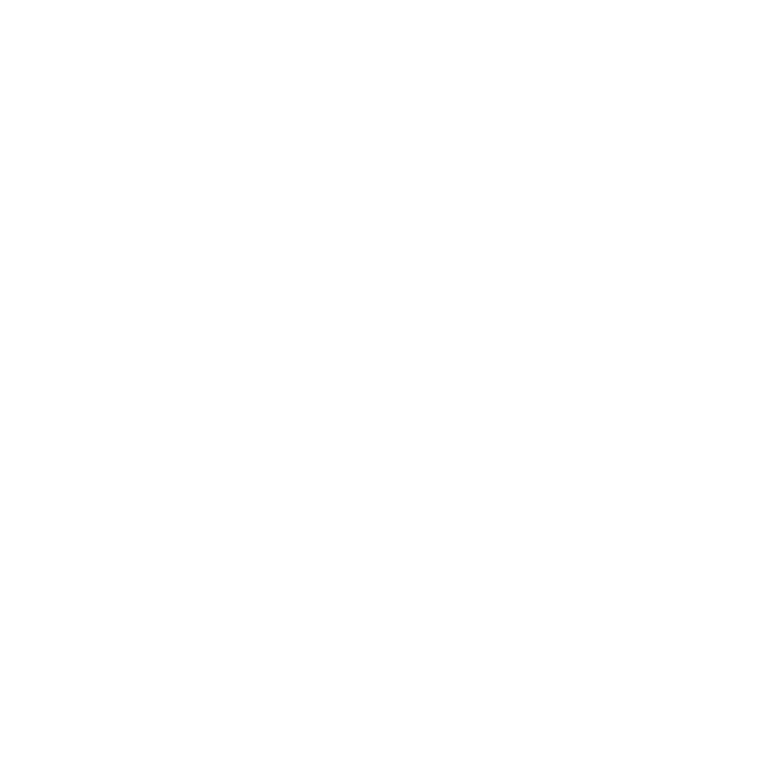

In [181]:
for col in df.drop(['SD','date'], axis =1).columns:
    sns.lmplot(x= 'SD', y= col, data = df)

# Correlation

<IPython.core.display.Javascript object>


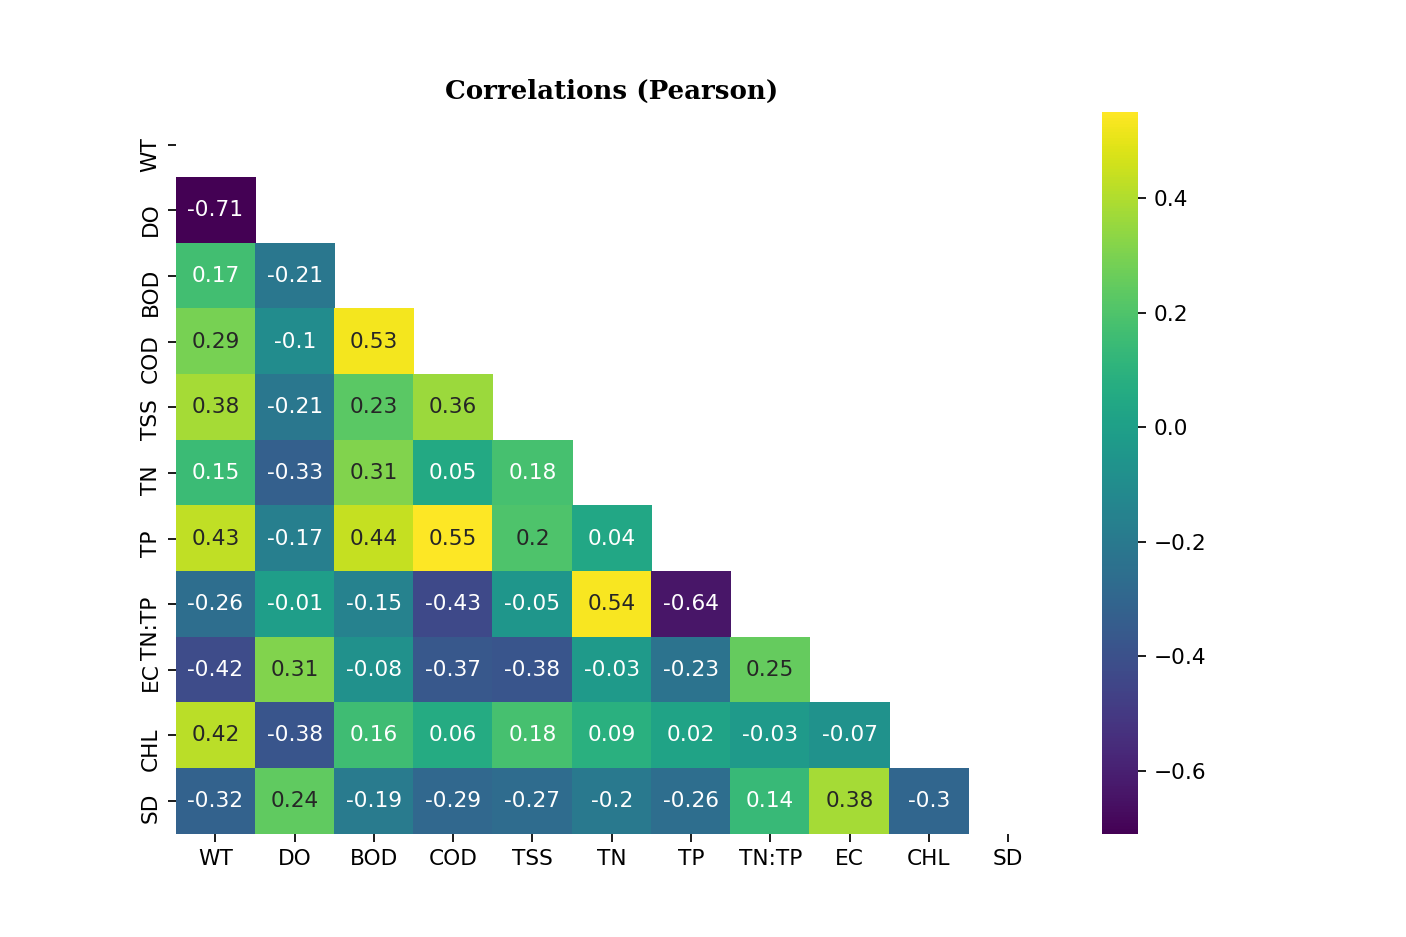

In [31]:
import numpy as np
def corr_plot(data,
              top_visible = False, right_visible = False, 
              bottom_visible = True, left_visible = False,
              ylabel = None, figsize = (9, 6), axis_grid = 'y'):
    fig, ax = plt.subplots(figsize = figsize)
    plt.title('Correlations (Pearson)', size = 12, fontweight = 'bold', fontfamily = 'serif')
    
    mask = np.triu(np.ones_like(data.corr(), dtype = bool))
    sns.heatmap(round(data.corr(), 2), mask = mask, cmap = 'viridis', annot = True)
    plt.show()
corr_plot(df)

In [36]:
df.corr()


WT        DO       BOD       COD       TSS        TN        TP  \
WT     1.000000 -0.710737  0.171386  0.291399  0.378023  0.150693  0.433851   
DO    -0.710737  1.000000 -0.213559 -0.097521 -0.212631 -0.330019 -0.174485   
BOD    0.171386 -0.213559  1.000000  0.529719  0.225734  0.310512  0.439424   
COD    0.291399 -0.097521  0.529719  1.000000  0.358590  0.050933  0.545592   
TSS    0.378023 -0.212631  0.225734  0.358590  1.000000  0.182564  0.201347   
TN     0.150693 -0.330019  0.310512  0.050933  0.182564  1.000000  0.044319   
TP     0.433851 -0.174485  0.439424  0.545592  0.201347  0.044319  1.000000   
TN:TP -0.263192 -0.007831 -0.152633 -0.434274 -0.053490  0.539699 -0.640883   
EC    -0.419904  0.308045 -0.076024 -0.374632 -0.384921 -0.027351 -0.230213   
CHL    0.417032 -0.384458  0.156402  0.058912  0.181890  0.090728  0.023124   
SD    -0.323678  0.239070 -0.189086 -0.289820 -0.272428 -0.198791 -0.263781   

          TN:TP        EC       CHL        SD  
WT    -0.263192 -0.419904  0.417032 -0.323678  
DO    -0.007831  0.308045 -0.384458  0.239070  
BOD   -0.152633 -0.076024  0.156402 -0.189086  
COD   -0.434274 -0.374632  0.058912 -0.289820  
TSS   -0.053490 -0.384921  0.181890 -0.272428  
TN     0.539699 -0.027351  0.090728 -0.198791  
TP    -0.640883 -0.230213  0.023124 -0.263781  
TN:TP  1.000000  0.248433 -0.033104  0.139449  
EC     0.248433  1.000000 -0.066140  0.379797  
CHL   -0.033104 -0.066140  1.000000 -0.301963  
SD     0.139449  0.379797 -0.301963  1.000000

In [47]:
from scipy import stats
col_drop = []
for col in df.drop(['date','CHL'], axis =1).columns:
    pearson_coef, p_value = stats.pearsonr(df[col], df['CHL'])
#     print(col, pearson_coef, p_value)
    if p_value < 0.1:
        print(col,"coef:", pearson_coef.round(5),"p:", p_value.round(3))
        col_drop.append(col)

WT coef: 0.41703 p: 0.0
DO coef: -0.38446 p: 0.0
SD coef: -0.30196 p: 0.006


In [38]:
for col in df.columns:
    print(col)

date
WT
DO
BOD
COD
TSS
TN
TP
TN:TP
EC
CHL
SD


In [40]:
df.DO

0     10.7
1     12.3
2     11.4
3      7.0
4      3.8
      ... 
75     5.8
76     4.9
77     4.4
78     4.7
79     7.1
Name: DO, Length: 80, dtype: float64

# outliers

In [48]:
def outlier (x='age'):
    Q1 = df[x].quantile(0.25)
    Q3 = df[x].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    df2 =df[(df[x]<lower) | (df[x]>upper)]
    print('no. of outliers:',len(df2))
    return df2

In [52]:
outlier('CHL').index

no. of outliers: 7


Int64Index([30, 39, 40, 41, 52, 61, 73], dtype='int64')

In [53]:

df = df.drop (index= [1,30, 39, 40, 41, 52, 61, 73]).reset_index(drop =True)

In [54]:
from scipy import stats
col_drop = []
for col in df.drop(['date','CHL'], axis =1).columns:
    pearson_coef, p_value = stats.pearsonr(df[col], df['CHL'])
#     print(col, pearson_coef, p_value)
    if p_value < 0.1:
        print(col,"coef:", pearson_coef.round(3),"p:", p_value.round(3))
        col_drop.append(col)

WT coef: 0.472 p: 0.0
DO coef: -0.35 p: 0.003
BOD coef: 0.235 p: 0.047
COD coef: 0.219 p: 0.065
TSS coef: 0.473 p: 0.0
EC coef: -0.237 p: 0.045
SD coef: -0.263 p: 0.026


In [55]:
outlier('SD')

no. of outliers: 3


date    WT    DO  BOD  COD  TSS     TN    TP      TN:TP     EC  CHL  \
0  1993-02-01   4.0  10.7  1.2  2.1  2.2  0.911  14.0  65.071429  185.0  2.0   
3  1993-06-01  15.0   3.8  1.5  2.4  7.1  1.984  28.0  70.857143  178.0  1.0   
31 1995-12-01   8.0  11.8  1.4  3.2  2.6  1.024  34.0  30.117647  209.0  8.2   

     SD  
0   3.1  
3   3.5  
31  3.5

<IPython.core.display.Javascript object>


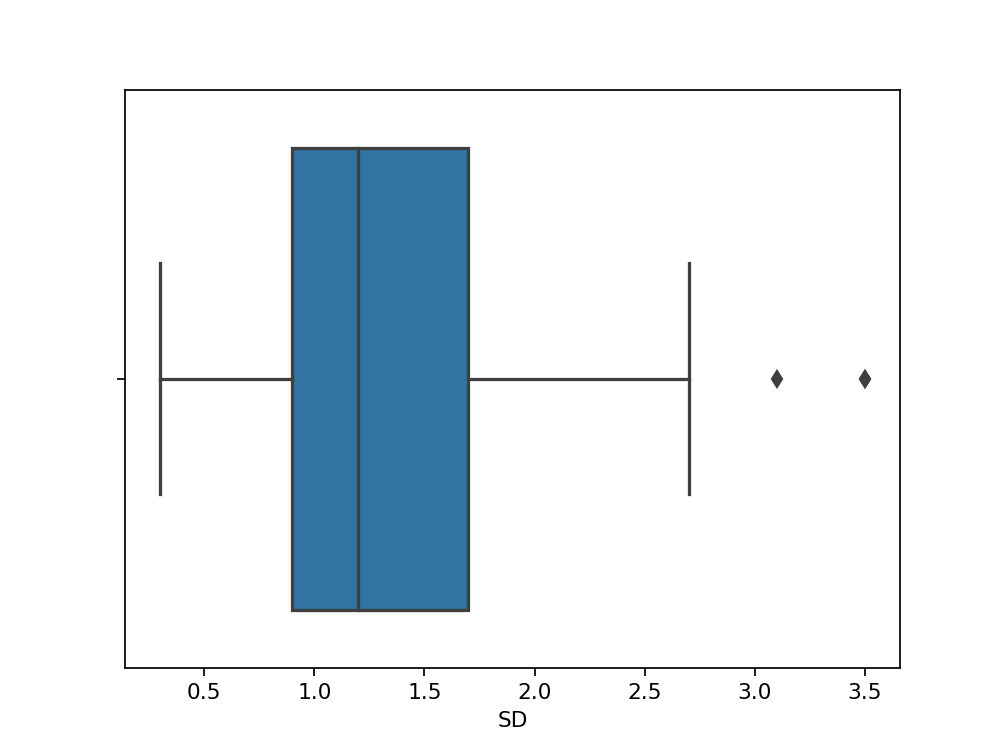

In [57]:
plt.figure()
sns.boxplot(df.SD)

# Model_building

In [191]:
import scipy.stats
from sklearn.metrics import r2_score , mean_absolute_error,  mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm                 
from sklearn.linear_model import LogisticRegression                              
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier


In [192]:
# skf = df.skew()
# skf = skf[abs(skf)>.75].index
# df[skf]=np.log(df[skf])
# df.skew()

In [193]:
X= df.drop(['CHL','date'], axis= 1).values
y = df.CHL.values

In [194]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X)

lr=LinearRegression()

lr.fit(X2,y)
y_hat=lr.predict(X2)
residuals=y-y_hat

print('MSE:', mean_squared_error(y,y_hat))
print('RMSE:',mean_squared_error(y,y_hat)**0.5)
print('MAE:',mean_absolute_error(y,y_hat))
print('R2 Score:',r2_score(y,y_hat))

MSE: 12.335827337363039
RMSE: 3.512239646915204
MAE: 2.7607035925405636
R2 Score: 0.364832328153576


<IPython.core.display.Javascript object>


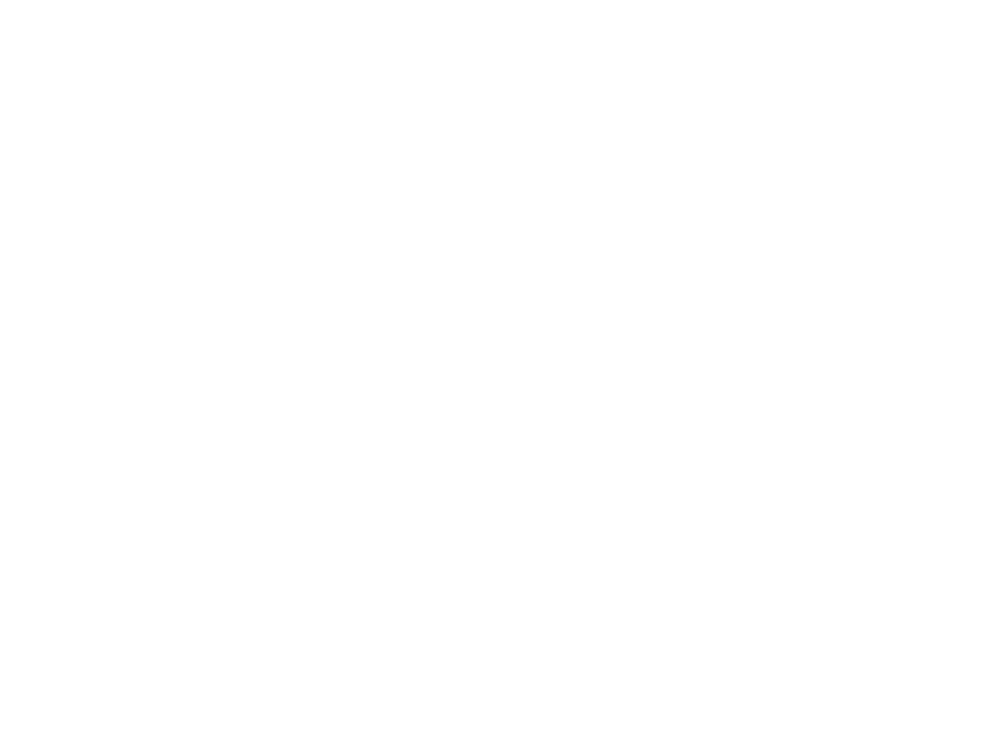

In [195]:
plt.figure()
plt.plot(residuals)

<IPython.core.display.Javascript object>


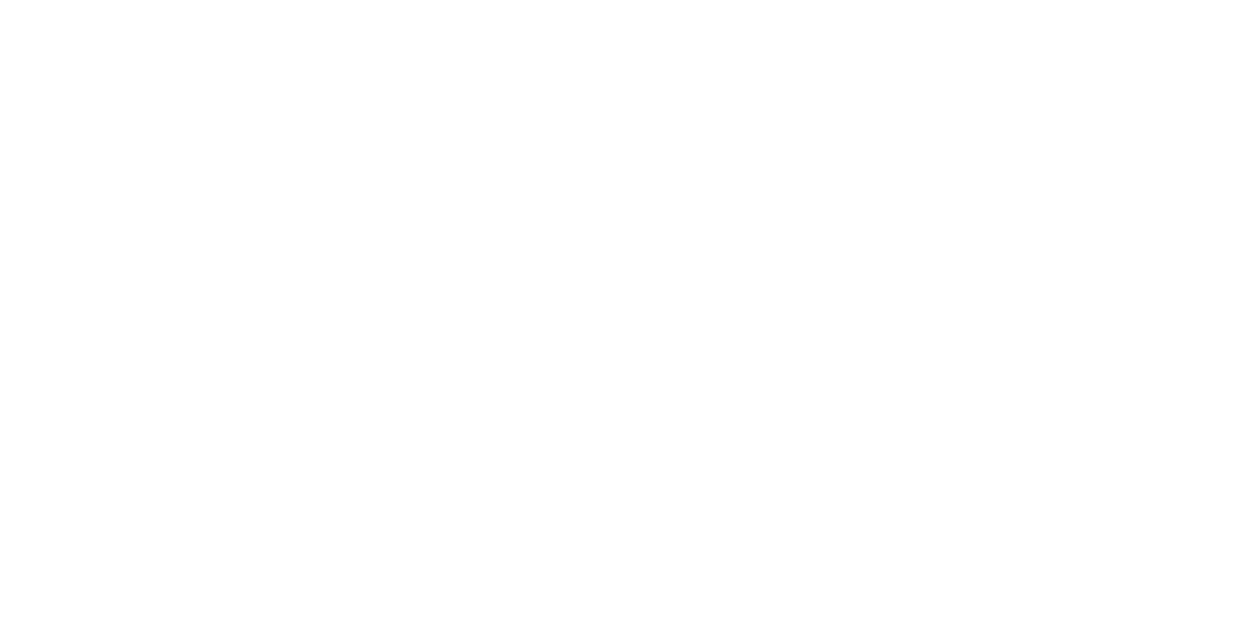

In [196]:
def PlotPrediction(true,predicted, title = "Dataset: "):
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(111)
    ax1.set_title(title + 'True vs Predicted')
    ax1.scatter(list(range(0,len(true))),true, s=10, c='r', marker="o", label='True')
    ax1.scatter(list(range(0,len(predicted))), predicted, s=10, c='b', marker="o", label='Predicted')
    plt.legend(loc='upper right');
    plt.show()
PlotPrediction(y,y_hat)

In [197]:
pd.DataFrame({'Actual': y, 'Predicted': y_hat})

Actual  Predicted
0      2.0   3.329614
1      1.6   4.839483
2      2.1   6.207368
3      1.0   6.089106
4      4.5   7.150474
..     ...        ...
67     8.1   8.094350
68    10.9   7.081080
69     8.9   7.840292
70     2.0   7.982948
71     0.5   5.600634

[72 rows x 2 columns]

In [198]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kfolds=KFold(n_splits=5,shuffle=True,random_state=42)
scale=RobustScaler().fit(X)
X1=scale.transform(X)
from sklearn.linear_model import Ridge

model=Ridge()
rid_param_grid = {"alpha":[0.1, 0.3, 1,2, 3,4, 5,6,7,8,9, 10, 15,19.8]}
grid_search= GridSearchCV(model,param_grid=rid_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)

grid_search.fit(X1,y)

rid_best=grid_search.best_estimator_
print(rid_best)

print(np.sqrt(-grid_search.best_score_))

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Ridge(alpha=19.8)
4.101888261840279


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  70 out of  70 | elapsed:    0.0s finished


In [199]:
from sklearn.linear_model import Lasso
model=Lasso()
las_param_grid = {"alpha":[3,2,1.5,1, 0.1, 0.001,.005 ,0.0005,0.00052]}
grid_search= GridSearchCV(model,param_grid=las_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
grid_search.fit(X1,y)
las_best=grid_search.best_estimator_
print(np.sqrt(-grid_search.best_score_))
print(las_best)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    0.0s remaining:    0.0s


4.031775249271713
Lasso(alpha=1)


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.0s finished


In [200]:
model = KNeighborsRegressor()
rid_param_grid = {"n_neighbors":[1, 3, 5, 10, 15,19.8]}
grid_search= GridSearchCV(model,param_grid=rid_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
grid_search.fit(X1,y)
knn_best=grid_search.best_estimator_
print(np.sqrt(-grid_search.best_score_))
print(knn_best)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
4.253955548606944
KNeighborsRegressor(n_neighbors=10)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    0.0s finished


In [201]:
from sklearn.model_selection import GridSearchCV
kfolds=KFold(n_splits=5,shuffle=True,random_state=42)
scale=RobustScaler().fit(X)
X1=scale.transform(X)
model=GradientBoostingRegressor()
gb_param_grid = {"n_estimators":[200,500,1000,2000],
                 "learning_rate":[1,.1,0.01],
                   "max_depth":[1,2,3,4,5]}

                   
                   
                   
grid_search= GridSearchCV(model,param_grid=gb_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
grid_search.fit(X1,y)
gb_best=grid_search.best_estimator_
np.sqrt(-grid_search.best_score_)

Fitting 5 folds for each of 60 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    7.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:   25.2s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:   39.1s finished


4.128618767284395

In [202]:
gb_best

GradientBoostingRegressor(learning_rate=0.01, max_depth=1, n_estimators=200)

In [203]:
models = [] 
models.append(('ln', LinearRegression())) 
models.append(('ridge', Ridge(alpha = 19.8))) 
models.append(('lasso', Lasso(alpha=1))) 
models.append(('kn', KNeighborsRegressor(n_neighbors=10))) 
models.append(('GBR', GradientBoostingRegressor(n_estimators = 500,max_depth=2,learning_rate=.01)))

n_folds = 5
results =[] 
names = []  
for name, model in models:
    kf = KFold(n_folds, shuffle=True, random_state=42).get_n_splits(X1)
    rmse= np.sqrt(-cross_val_score(model, X1, y, scoring="neg_mean_squared_error", cv = kf))
    msg = "%s: %f (%f)" % (name, rmse.mean(), rmse.std())
    print(msg)
    results.append(rmse) 
    names.append(name)

ln: 4.726149 (0.888188)
ridge: 3.981037 (0.465896)
lasso: 4.018719 (0.228402)
kn: 4.155923 (0.273515)
GBR: 4.133157 (0.465750)


<IPython.core.display.Javascript object>


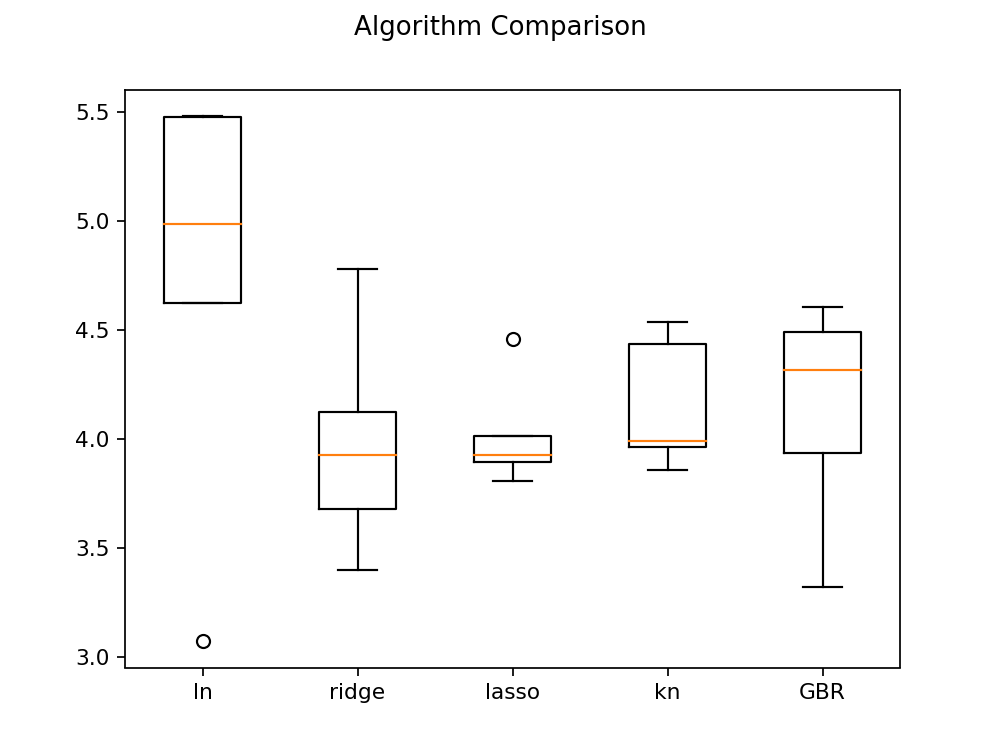

In [204]:
    
%matplotlib notebook
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [205]:
from mlxtend.regressor import StackingCVRegressor
stack_gen = StackingCVRegressor(regressors=(rid_best, las_best,knn_best,gb_best),
                                meta_regressor=gb_best,n_jobs=-1,
                                use_features_in_secondary=True)
stack_gen.fit(np.array(X1), np.array(y))
stack_gen.predict(X1)

array([ 5.0694729 ,  5.15089385,  5.96890026,  5.8874793 ,  6.99288484,
       12.33677271, 12.33677271,  7.49045282,  6.46646824,  5.64846184,
        5.56704088,  5.64846184,  5.64846184,  5.56704088,  6.92264902,
       12.33677271,  7.49045282, 10.4703009 ,  7.08013489,  6.46646824,
        5.56704088,  5.56704088,  5.56704088,  5.64846184,  6.10464261,
        6.46646824,  7.08013489,  7.49045282,  7.49045282,  7.40903187,
        6.38504729,  5.56704088,  5.56704088,  6.02322166,  5.56704088,
        5.64846184, 10.44605159,  6.38504729,  6.38504729,  6.38504729,
        5.56704088,  5.56704088,  5.56704088,  5.56704088,  6.38504729,
        6.38504729,  7.08013489,  6.38504729,  6.38504729,  5.56704088,
        5.64846184,  5.56704088,  5.56704088,  6.11514045,  7.65531416,
       12.33677271,  9.21517389,  7.40903187,  7.49045282,  7.08013489,
        5.64846184,  5.64846184,  5.64846184,  5.64846184,  5.64846184,
        6.46646824,  7.49045282,  7.95713144,  7.40903187,  7.49

In [206]:
np.sqrt(mean_squared_error(y,stack_gen.predict(X1)))

3.36270449184212

In [65]:
# def PlotPrediction(true,predicted, title = "Dataset: "):
#     fig = plt.figure(figsize=(8,4))
#     ax1 = fig.add_subplot(111)
#     ax1.set_title(title + 'True vs Predicted')
#     ax1.scatter(list(range(0,len(true))),true, s=10, c='r', marker="o", label='True')
#     ax1.scatter(list(range(0,len(predicted))), predicted, s=10, c='b', marker="o", label='Predicted')
#     plt.legend(loc='upper right');
#     plt.show()
# PlotPrediction(y,stack_gen.predict(X1))

In [64]:
# pd.DataFrame({'Actual': y, 'Predicted': stack_gen.predict(X1)})[:50]

# Just on model

In [61]:
df = pd.read_excel("Mahbub_demo_water quality Data.xlsx")

df[['WT','TP','EC']]=df[['WT','TP','EC']].astype(float)
df=df.drop(['Year','Month'],axis =1)

df=df.replace(0,np.nan)
df= df.interpolate()
df

WT   DO   BOD  COD   TSS     TN    TP     TN:TP      EC   CHL   SD
0    4.0  10.7  1.2  2.1   2.2  0.911  14.0  65.071429  185.0   2.0  3.1
1    4.0  12.3  1.3  2.2   1.1  1.678  29.0  57.862069  158.0   0.4  0.8
2    7.0  11.4  1.0  2.5   1.3  1.486  21.0  70.761905  175.0   1.6  0.7
3   12.0   7.0  0.9  2.9   1.9  0.792  20.0  39.600000  179.0   2.1  1.0
4   15.0   3.8  1.5  2.4   7.1  1.984  28.0  70.857143  178.0   1.0  3.5
..   ...   ...  ...  ...   ...    ...   ...        ...    ...   ...  ...
75  21.0   5.8  1.9  3.0  10.1  1.520  66.0  23.030303  100.0   8.1  0.6
76  21.0   4.9  1.6  3.1   3.7  1.675  40.0  41.875000  116.0  10.9  1.5
77  19.0   4.4  2.0  3.0   2.6  1.612  30.0  53.733333  104.0   8.9  0.8
78  16.0   4.7  2.0  3.0   3.5  1.461  23.0  63.521739  136.0   2.0  0.7
79  10.0   7.1  1.9  2.9   3.5  1.580  34.0  46.470588  134.0   0.5  0.8

[80 rows x 11 columns]

In [62]:

df.isna().sum()
df.dtypes

WT        float64
DO        float64
BOD       float64
COD       float64
TSS       float64
TN        float64
TP        float64
TN:TP     float64
EC        float64
CHL       float64
SD        float64
dtype: object

In [63]:

df = df.drop (index= [30, 39, 40, 41, 52, 61, 73]).reset_index(drop=True)
df

WT   DO   BOD  COD   TSS     TN    TP     TN:TP      EC   CHL   SD
0    4.0  10.7  1.2  2.1   2.2  0.911  14.0  65.071429  185.0   2.0  3.1
1    4.0  12.3  1.3  2.2   1.1  1.678  29.0  57.862069  158.0   0.4  0.8
2    7.0  11.4  1.0  2.5   1.3  1.486  21.0  70.761905  175.0   1.6  0.7
3   12.0   7.0  0.9  2.9   1.9  0.792  20.0  39.600000  179.0   2.1  1.0
4   15.0   3.8  1.5  2.4   7.1  1.984  28.0  70.857143  178.0   1.0  3.5
..   ...   ...  ...  ...   ...    ...   ...        ...    ...   ...  ...
68  21.0   5.8  1.9  3.0  10.1  1.520  66.0  23.030303  100.0   8.1  0.6
69  21.0   4.9  1.6  3.1   3.7  1.675  40.0  41.875000  116.0  10.9  1.5
70  19.0   4.4  2.0  3.0   2.6  1.612  30.0  53.733333  104.0   8.9  0.8
71  16.0   4.7  2.0  3.0   3.5  1.461  23.0  63.521739  136.0   2.0  0.7
72  10.0   7.1  1.9  2.9   3.5  1.580  34.0  46.470588  134.0   0.5  0.8

[73 rows x 11 columns]

In [64]:
from scipy import stats
col_drop = []
for col in df.drop(['CHL'], axis =1).columns:
    pearson_coef, p_value = stats.pearsonr(df[col], df['CHL'])
#     print(col, pearson_coef, p_value)
    if p_value < 0.1:
        print(col,"coef:", pearson_coef.round(3),"p:", p_value.round(3))
        col_drop.append(col)

WT coef: 0.483 p: 0.0
DO  coef: -0.367 p: 0.001
BOD coef: 0.246 p: 0.036
COD coef: 0.236 p: 0.045
TSS coef: 0.477 p: 0.0
EC coef: -0.229 p: 0.052
SD coef: -0.241 p: 0.04


In [66]:
import scipy.stats
from sklearn.metrics import r2_score , mean_absolute_error,  mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn import model_selection
from sklearn.ensemble import BaggingClassifier 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
import xgboost as xgb
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.model_selection import StratifiedKFold

from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn import svm                 
from sklearn.linear_model import LogisticRegression                              
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
df

WT   DO   BOD  COD   TSS     TN    TP     TN:TP      EC   CHL   SD
0    4.0  10.7  1.2  2.1   2.2  0.911  14.0  65.071429  185.0   2.0  3.1
1    4.0  12.3  1.3  2.2   1.1  1.678  29.0  57.862069  158.0   0.4  0.8
2    7.0  11.4  1.0  2.5   1.3  1.486  21.0  70.761905  175.0   1.6  0.7
3   12.0   7.0  0.9  2.9   1.9  0.792  20.0  39.600000  179.0   2.1  1.0
4   15.0   3.8  1.5  2.4   7.1  1.984  28.0  70.857143  178.0   1.0  3.5
..   ...   ...  ...  ...   ...    ...   ...        ...    ...   ...  ...
68  21.0   5.8  1.9  3.0  10.1  1.520  66.0  23.030303  100.0   8.1  0.6
69  21.0   4.9  1.6  3.1   3.7  1.675  40.0  41.875000  116.0  10.9  1.5
70  19.0   4.4  2.0  3.0   2.6  1.612  30.0  53.733333  104.0   8.9  0.8
71  16.0   4.7  2.0  3.0   3.5  1.461  23.0  63.521739  136.0   2.0  0.7
72  10.0   7.1  1.9  2.9   3.5  1.580  34.0  46.470588  134.0   0.5  0.8

[73 rows x 11 columns]

In [67]:
X= df.drop(['CHL'], axis= 1)
y = df.CHL
X

WT   DO   BOD  COD   TSS     TN    TP     TN:TP      EC   SD
0    4.0  10.7  1.2  2.1   2.2  0.911  14.0  65.071429  185.0  3.1
1    4.0  12.3  1.3  2.2   1.1  1.678  29.0  57.862069  158.0  0.8
2    7.0  11.4  1.0  2.5   1.3  1.486  21.0  70.761905  175.0  0.7
3   12.0   7.0  0.9  2.9   1.9  0.792  20.0  39.600000  179.0  1.0
4   15.0   3.8  1.5  2.4   7.1  1.984  28.0  70.857143  178.0  3.5
..   ...   ...  ...  ...   ...    ...   ...        ...    ...  ...
68  21.0   5.8  1.9  3.0  10.1  1.520  66.0  23.030303  100.0  0.6
69  21.0   4.9  1.6  3.1   3.7  1.675  40.0  41.875000  116.0  1.5
70  19.0   4.4  2.0  3.0   2.6  1.612  30.0  53.733333  104.0  0.8
71  16.0   4.7  2.0  3.0   3.5  1.461  23.0  63.521739  136.0  0.7
72  10.0   7.1  1.9  2.9   3.5  1.580  34.0  46.470588  134.0  0.8

[73 rows x 10 columns]

In [68]:

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X2 = scaler.fit_transform(X)

lr=LinearRegression()

lr.fit(X2,y)
y_hat=lr.predict(X2)
residuals=y-y_hat

print('MSE:', mean_squared_error(y,y_hat))
print('RMSE:',mean_squared_error(y,y_hat)**0.5)
print('MAE:',mean_absolute_error(y,y_hat))
print('R2 Score:',r2_score(y,y_hat))

MSE: 12.298444472538835
RMSE: 3.5069138102523754
MAE: 2.748686918308855
R2 Score: 0.37573999946126546


In [18]:
lr.coef_

array([ 7.61241017, -0.18062534,  5.96752037, -0.1270191 ,  9.65486468,
       -1.70030104, -4.25385475,  0.04517813,  1.86637415, -2.20774387])

In [69]:
pd.DataFrame(list (zip(lr.coef_.round(), X.columns)), 
             columns = ['coef', 'feature']).sort_values('coef',ascending= False)

coef feature
4  10.0     TSS
0   8.0      WT
2   6.0     BOD
8   2.0      EC
1  -0.0     DO 
3  -0.0     COD
7   0.0  TN:TP 
5  -2.0      TN
9  -2.0      SD
6  -4.0      TP

<IPython.core.display.Javascript object>


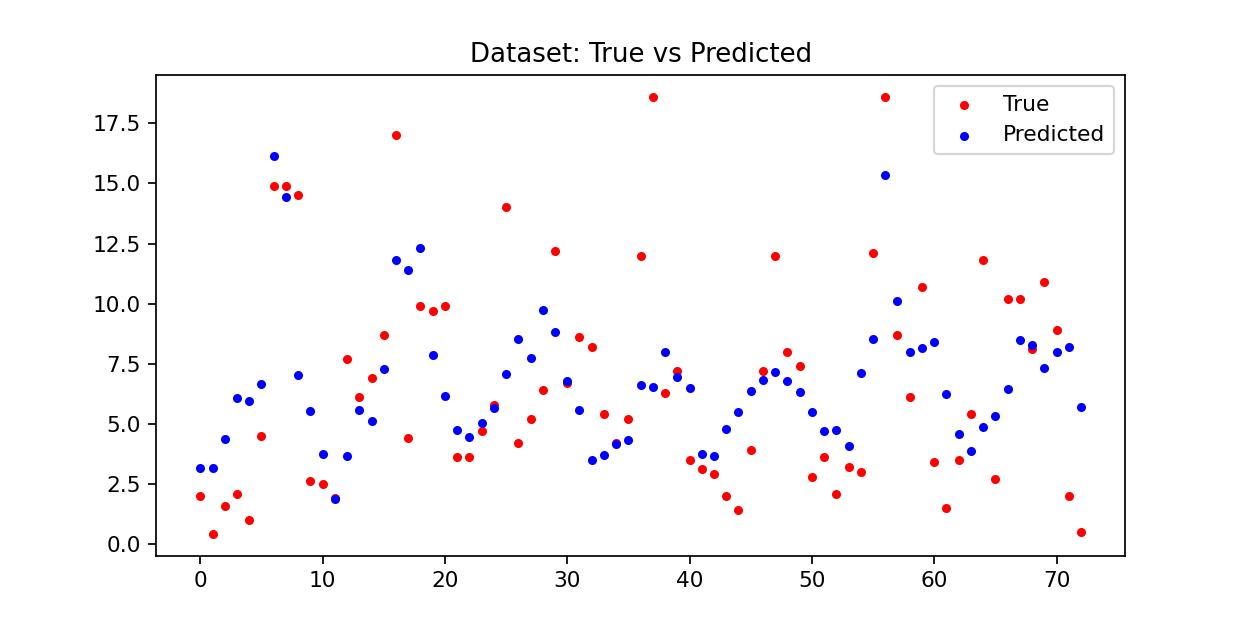

In [70]:
def PlotPrediction(true,predicted, title = "Dataset: "):
    fig = plt.figure(figsize=(8,4))
    ax1 = fig.add_subplot(111)
    ax1.set_title(title + 'True vs Predicted')
    ax1.scatter(list(range(0,len(true))),true, s=10, c='r', marker="o", label='True')
    ax1.scatter(list(range(0,len(predicted))), predicted, s=10, c='b', marker="o", label='Predicted')
    plt.legend(loc='upper right');
    plt.show()
PlotPrediction(y,y_hat)

# SVM

###  The Higher values of C correspond to lessregularization. 
In other words, when you use a high value for the parameter C, Logis
ticRegression and LinearSVC try to fit the training set as best as possible, while with
low values of the parameter C, the models put more emphasis on finding a coefficient
vector (w) that is close to zero. 
## so, C shouldn't be too high
## Small gamma:  (more generalized solution)

In [74]:
from sklearn.svm import SVR

model = SVR(kernel ='rbf',C =4)
model.fit(X2,y)
y_hat=model.predict(X2)


print('MSE:', mean_squared_error(y,y_hat))
print('RMSE:',mean_squared_error(y,y_hat)**0.5)
print('MAE:',mean_absolute_error(y,y_hat))
print('R2 Score:',r2_score(y,y_hat))

MSE: 10.328413595813968
RMSE: 3.2137849330367407
MAE: 2.107597898485997
R2 Score: 0.4757373185459377


In [75]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=40)

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train_scaled = scaler.fit_transform(x_train)
# we must apply the scaling to the test set that we computed for the training set
x_test_scaled = scaler.transform(x_test)

In [77]:
linreg = model = SVR(kernel ='rbf',C = 10).fit(x_train_scaled,y_train)
y_hat=linreg.predict(x_train_scaled)

print(linreg.score(x_train_scaled,y_train))
print('test:',linreg.score(x_test_scaled,y_test))

0.6624629748326585
test: -1.0349432330591974



### A higher alpha means a more restricted model, so we expect the entries of coef_ to
### have smaller magnitude for a high value of alpha than for a low value of alpha


low alpha means more regularization and too low means we r going to end up as normal linear regression

In [78]:
from sklearn.preprocessing import RobustScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

kfolds=KFold(n_splits=5,shuffle=True,random_state=42)
scale=RobustScaler().fit(X)
X1=scale.transform(X)
from sklearn.linear_model import Ridge

model=Ridge()

rid_param_grid = {"alpha":[0.1, 0.3, 1,2, 3,4, 5,6,7,8,9, 10, 15,19.8]}
grid_search= GridSearchCV(model,param_grid=rid_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1)

grid_search.fit(X1,y)

rid_best=grid_search.best_estimator_
print(rid_best)

print(np.sqrt(-grid_search.best_score_))

Ridge(alpha=19.8)
4.094400644997972


In [80]:
r2_score(y,rid_best.predict(X1))

0.34445253458319514

In [81]:
from sklearn.linear_model import Lasso
model=Lasso()
las_param_grid = {"alpha":[3,2,1.5,1, 0.1, 0.001,.005 ,0.0005,0.00052]}
grid_search= GridSearchCV(model,param_grid=las_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
grid_search.fit(X1,y)
las_best=grid_search.best_estimator_
print(np.sqrt(-grid_search.best_score_))
print(las_best)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


4.1612494980736034
Lasso(alpha=1)


[Parallel(n_jobs=-1)]: Done  38 out of  45 | elapsed:    3.4s remaining:    0.5s
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    3.5s finished


In [82]:
model = KNeighborsRegressor()
rid_param_grid = {"n_neighbors":[1, 2,3, 5, 10, 15,19.8]}
grid_search= GridSearchCV(model,param_grid=rid_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1)
grid_search.fit(X1,y)
knn_best=grid_search.best_estimator_
print(np.sqrt(-grid_search.best_score_))
print(knn_best)

4.176839691623777
KNeighborsRegressor(n_neighbors=10)


In [83]:
list(np.arange(6,100,0.1))

[6.0,
 6.1,
 6.199999999999999,
 6.299999999999999,
 6.399999999999999,
 6.499999999999998,
 6.599999999999998,
 6.6999999999999975,
 6.799999999999997,
 6.899999999999997,
 6.9999999999999964,
 7.099999999999996,
 7.199999999999996,
 7.299999999999995,
 7.399999999999995,
 7.499999999999995,
 7.599999999999994,
 7.699999999999994,
 7.799999999999994,
 7.899999999999993,
 7.999999999999993,
 8.099999999999993,
 8.199999999999992,
 8.299999999999992,
 8.399999999999991,
 8.499999999999991,
 8.59999999999999,
 8.69999999999999,
 8.79999999999999,
 8.89999999999999,
 8.99999999999999,
 9.099999999999989,
 9.199999999999989,
 9.299999999999988,
 9.399999999999988,
 9.499999999999988,
 9.599999999999987,
 9.699999999999987,
 9.799999999999986,
 9.899999999999986,
 9.999999999999986,
 10.099999999999985,
 10.199999999999985,
 10.299999999999985,
 10.399999999999984,
 10.499999999999984,
 10.599999999999984,
 10.699999999999983,
 10.799999999999983,
 10.899999999999983,
 10.999999999999982,
 

# SVM

In [84]:
from sklearn.svm import SVR
model=SVR(kernel='poly')
svr_param_grid = {"C":list(np.arange(6,65,.5)),
                 "gamma":[6.105402296585326e-05,0.0001,0.001,0.01,2,1],
                 "coef0":[.01,.05,.1,],
                 "degree":[2,3,4,5,6]}
grid_search= GridSearchCV(model,param_grid=svr_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs=- 1)
grid_search.fit(X1,y)
svr_best=grid_search.best_estimator_
print(np.sqrt(-grid_search.best_score_))
print(svr_best)

KeyboardInterrupt: 

In [85]:
from sklearn.svm import SVR
model=SVR(kernel='rbf')
svr_param_grid = {"C":list(np.arange(6,65,.5)),
                 "gamma":[6.105402296585326e-05,0.0001,0.001,0.01,0.1,1,]}
grid_search= GridSearchCV(model,param_grid=svr_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs=- 1, verbose =True)
grid_search.fit(X1,y)
svr_best=grid_search.best_estimator_
print(np.sqrt(-grid_search.best_score_))
print(svr_best)

Fitting 5 folds for each of 708 candidates, totalling 3540 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  74 tasks      | elapsed:    4.0s


3.9332214596107447
SVR(C=40.0, gamma=0.001)


[Parallel(n_jobs=-1)]: Done 3540 out of 3540 | elapsed:    7.3s finished


In [86]:
r2_score(y,svr_best.predict(X1))

0.29854006640564934

In [87]:
from sklearn.model_selection import GridSearchCV
kfolds=KFold(n_splits=5,shuffle=True,random_state=42)
scale=RobustScaler().fit(X)
X1=scale.transform(X)
model=GradientBoostingRegressor()
gb_param_grid = {"n_estimators":[200,500,1000,2000],
                 "learning_rate":[1,.1,0.01,.05],
                   "max_depth":[2,3,4,5]}

                   
                   
                   
grid_search= GridSearchCV(model,param_grid=gb_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1)
grid_search.fit(X1,y)
gb_best=grid_search.best_estimator_
np.sqrt(-grid_search.best_score_)

4.245426697041407

In [76]:
# from sklearn.model_selection import GridSearchCV
# kfolds=KFold(n_splits=5,shuffle=True,random_state=42)
# scale=RobustScaler().fit(X)
# X1=scale.transform(X)
# model=xgb.XGBRegressor()
# xgb_param_grid = {"n_estimators":[100,200,500,1000],
#                  "learning_rate":[.1,.05,0.01],
#                    "max_depth":[2,3,4,5],
#                  "gamma":[.01,.1,0,.2,.5],
#                 "objective":['reg:squarederror'],
#                 "reg_alpha":[0.1,.2,.3,1],
#                 "reg_lambda":[0.5,.01,1]
#                   }
                   
                   
                   
# grid_search= GridSearchCV(model,param_grid=xgb_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)
# grid_search.fit(X1,y)
# xgb_best=grid_search.best_estimator_
# np.sqrt(-grid_search.best_score_)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 392 tasks      | elapsed:   23.8s
[Parallel(n_jobs=-1)]: Done 754 tasks      | elapsed:   58.8s
[Parallel(n_jobs=-1)]: Done 1260 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 1870 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 2732 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 3570 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 4632 tasks      | elapsed:  6.5min
[Parallel(n_jobs=-1)]: Done 5778 tasks      | elapsed:  8.3min
[Parallel(n_jobs=-1)]: Done 7576 tasks      | elapsed: 10.1min
[Parallel(n_jobs=-1)]: Done 9240 tasks      | elapsed: 12.3min
[Parallel(n_jobs=-1)]: Done 10816 tasks      | elapsed: 14.8min
[Parallel(n_jobs=-1)]: Done 12588 tasks      | elapsed: 17.3min
[Parallel(n_jobs=-1)]: Done 14400 out of 14400 | elapsed: 20.1min finished


4.094581301825162

In [93]:
xgb_best

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=5,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0.1, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [102]:
kfolds=KFold(n_splits=5,shuffle=True,random_state=42)
scale=RobustScaler().fit(X)
X1=scale.transform(X)
from sklearn.kernel_ridge import KernelRidge

k=KernelRidge(  kernel='polynomial')
rid_param_grid = {"alpha":[.01,.001,.05,0.1, 0.3, 1,2, 3,4, 5,6,7,8,9, 10, 15,2021,22,25],
                   "degree":[1,2,3,4],
                 "coef0":[.1,.5,1,1.5,2,2.5,3,3.5]}
grid_search= GridSearchCV(k,param_grid=rid_param_grid,cv=kfolds,scoring="neg_mean_squared_error",n_jobs= -1, verbose = 1)

grid_search.fit(X1,y)

k_best=grid_search.best_estimator_
print(k_best)

print(np.sqrt(-grid_search.best_score_))

Fitting 5 folds for each of 608 candidates, totalling 3040 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  71 tasks      | elapsed:    2.0s


KernelRidge(alpha=5, coef0=3.5, degree=1, kernel='polynomial')
4.062930320016431


[Parallel(n_jobs=-1)]: Done 3040 out of 3040 | elapsed:    3.8s finished


In [142]:
models = [] 
models.append(('ln', LinearRegression())) 
models.append(('ridge', Ridge(alpha = 19.8))) 
models.append(('lasso', Lasso(alpha=1))) 
models.append(('kn', KNeighborsRegressor(n_neighbors=10))) 
models.append(('GBR', GradientBoostingRegressor(n_estimators = 200,max_depth=4,learning_rate=.01)))

models.append(('svr',SVR( C=40.0, gamma=0.001)))


n_folds = 5
results =[] 
names = []  
for name, model in models:
    kf = KFold(n_folds, shuffle=True, random_state=42)              #.get_n_splits(X1)
    rmse= np.sqrt(-cross_val_score(model, X1, y, scoring="neg_mean_squared_error", cv = kf))
    msg = "%s: %f (%f)" % (name, rmse.mean(), rmse.std())
    print(msg)
    results.append(rmse) 
    names.append(name)

ln: 4.298316 (0.623488)
ridge: 4.070667 (0.440217)
lasso: 4.110223 (0.649665)
kn: 4.130723 (0.618963)
GBR: 4.234495 (0.503358)
svr: 3.898638 (0.520433)


<IPython.core.display.Javascript object>


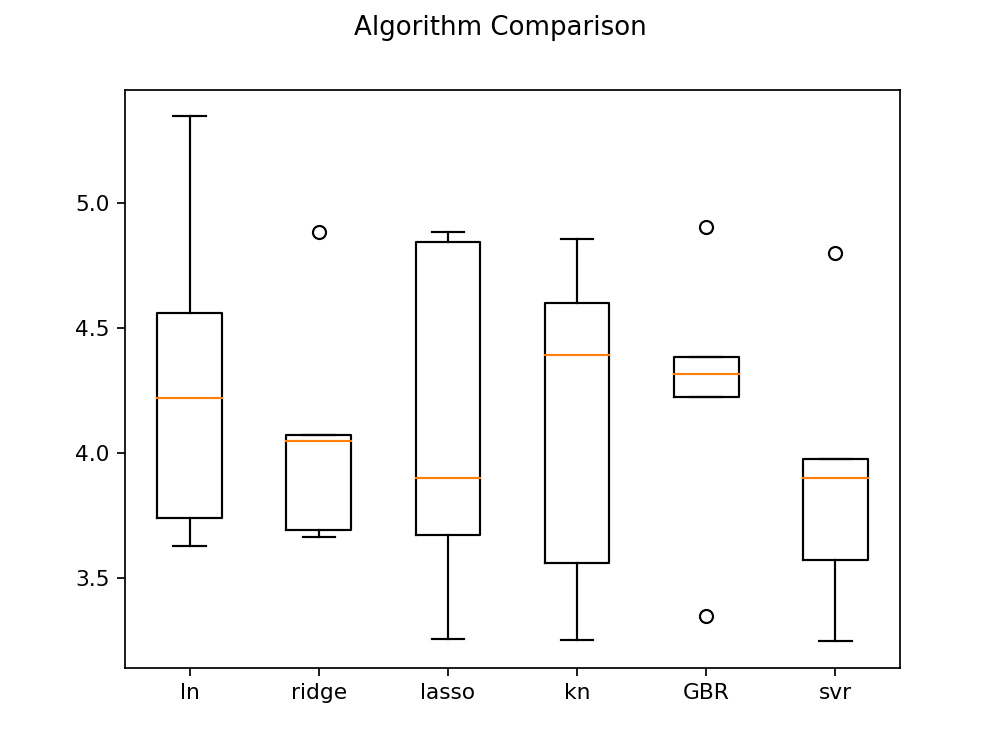

In [143]:
%matplotlib notebook
fig = plt.figure() 
fig.suptitle('Algorithm Comparison') 
ax = fig.add_subplot(111) 
plt.boxplot(results) 
ax.set_xticklabels(names) 
plt.show()

In [135]:
from mlxtend.regressor import StackingCVRegressor
for i in range(100): 
    stack_gen = StackingCVRegressor(regressors=(rid_best,svr_best, las_best,knn_best,gb_best,xgb_best,k_best),
                                    meta_regressor=xgb_best,n_jobs=-1,
                                    use_features_in_secondary=True)
    stack_gen.fit(np.array(X1), np.array(y))
    stack_gen.predict(X1)
    print("loss",np.sqrt(mean_squared_error(y,stack_gen.predict(X1))))
    print("r**2 value: ",r2_score(y,stack_gen.predict(X1)).round(2))

loss 2.2510459218945162
r**2 value:  0.74
loss 2.1949891159554014
r**2 value:  0.76
loss 1.8819543190735295
r**2 value:  0.82
loss 1.4912243811805068
r**2 value:  0.89
loss 1.5163820274624744
r**2 value:  0.88
loss 1.5810346336794172
r**2 value:  0.87
loss 2.0091927953920057
r**2 value:  0.8
loss 1.3318203626287886
r**2 value:  0.91
loss 2.081429810946512
r**2 value:  0.78
loss 2.1270173052870756
r**2 value:  0.77
loss 1.8816999968293557
r**2 value:  0.82
loss 1.74834488631664
r**2 value:  0.84
loss 1.7747103471877583
r**2 value:  0.84
loss 1.5204992859864546
r**2 value:  0.88
loss 1.215014489569956
r**2 value:  0.93
loss 1.811269226438049
r**2 value:  0.83
loss 1.4600496865945383
r**2 value:  0.89
loss 1.710148229475339
r**2 value:  0.85
loss 2.222492958943687
r**2 value:  0.75
loss 1.7838959404611805
r**2 value:  0.84
loss 1.732427726822026
r**2 value:  0.85
loss 1.913817703062025
r**2 value:  0.81
loss 1.485421252874083
r**2 value:  0.89
loss 1.7777216137899199
r**2 value:  0.84
los

<IPython.core.display.Javascript object>


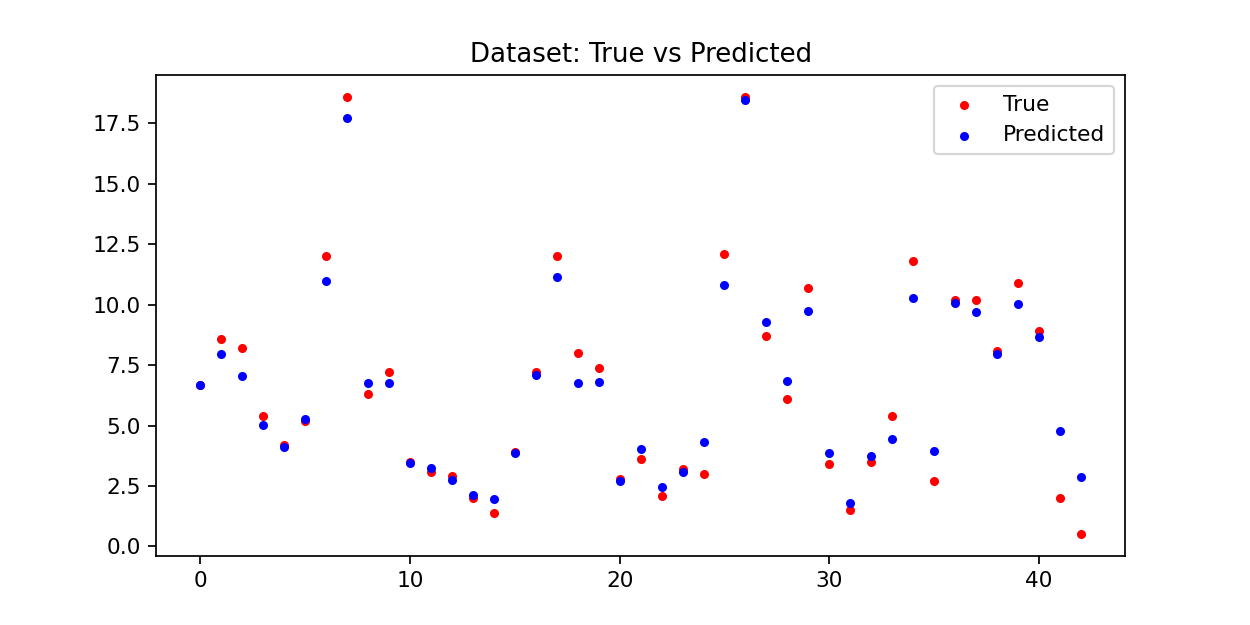

In [108]:
PlotPrediction(y[30:],stack_gen.predict(X1)[30:])

In [133]:
for i in range (10):
    print(i)

0
1
2
3
4
5
6
7
8
9


In [109]:
pd.DataFrame({'Actual': y, 'Predicted': stack_gen.predict(X1)})[:50]

Actual  Predicted
0      2.0   2.707584
1      0.4   1.987678
2      1.6   1.928629
3      2.1   3.018723
4      1.0   3.250108
5      4.5   5.421607
6     14.9  14.915529
7     14.9  14.892463
8     14.5  12.554419
9      2.6   2.200213
10     2.5   3.351095
11     1.9   2.345610
12     7.7   6.831448
13     6.1   6.624936
14     6.9   6.760166
15     8.7   7.907218
16    17.0  17.150661
17     4.4   4.499517
18     9.9  10.810277
19     9.7   9.518720
20     9.9   9.770905
21     3.6   3.412636
22     3.6   3.739810
23     4.7   5.050054
24     5.8   5.931363
25    14.0  13.183298
26     4.2   3.687382
27     5.2   6.694174
28     6.4   6.111956
29    12.2   9.056632
30     6.7   6.689484
31     8.6   7.944411
32     8.2   7.069880
33     5.4   5.034063
34     4.2   4.099970
35     5.2   5.285962
36    12.0  10.988876
37    18.6  17.717697
38     6.3   6.773380
39     7.2   6.757096
40     3.5   3.439135
41     3.1   3.244217
42     2.9   2.740772
43     2.0   2.110980
44     1.4   1.945397
45     3.9   3.872369
46     7.2   7.109240
47    12.0  11.128609
48     8.0   6.741930
49     7.4   6.794849

In [137]:
from sklearn.kernel_ridge import KernelRidge
kk = KernelRidge(alpha=0.01, kernel='polynomial', degree=3, coef0=2.5)
kk.fit(X1,y)
y_hat= kk.predict(X1)
print("loss:",np.sqrt(mean_squared_error(y,y_hat)))
print("r**2 value: ",r2_score(y,y_hat).round(2))

loss: 0.3645379410438793
r**2 value:  0.99


<IPython.core.display.Javascript object>


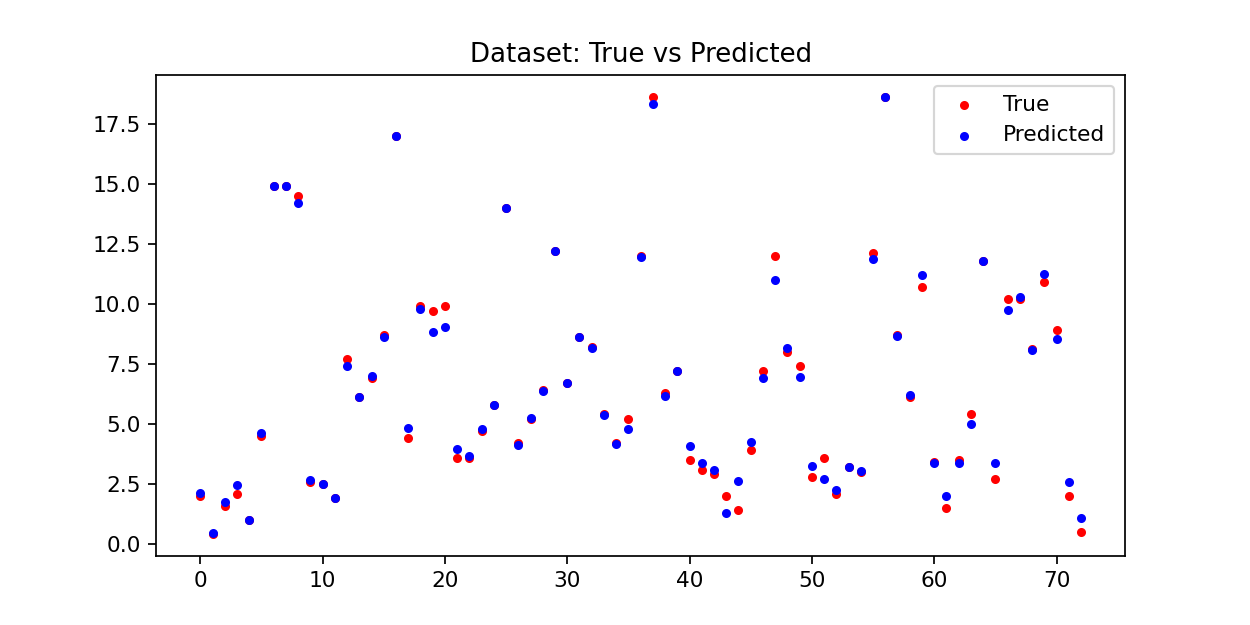

In [126]:
PlotPrediction(y,y_hat)

In [148]:
svr = SVR(kernel='linear')
lasso = Lasso()
rf = RandomForestRegressor(n_estimators=500)

# Starting from v0.16.0, StackingCVRegressor supports
# `random_state` to get deterministic result.
stack = StackingCVRegressor(regressors=(svr, lasso, rf),
                            meta_regressor=rf,use_features_in_secondary=True)

print('5-fold cross validation scores:\n')

for clf, label in zip([svr, lasso, rf, stack], ['SVM', 'Lasso', 
                                                'Random Forest', 
                                                'StackingCVRegressor']):
    scores = cross_val_score(clf, X1, y, cv=5)
    print("R^2 Score: %0.2f (+/- %0.2f) [%s]" % (
        scores.mean(), scores.std(), label))

5-fold cross validation scores:

R^2 Score: 0.05 (+/- 0.38) [SVM]
R^2 Score: 0.11 (+/- 0.15) [Lasso]
R^2 Score: 0.22 (+/- 0.17) [Random Forest]
R^2 Score: 0.16 (+/- 0.15) [StackingCVRegressor]
